<a href="https://colab.research.google.com/github/BenKohn2004/Fencing_Tracking_Example/blob/main/Data_Collection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive


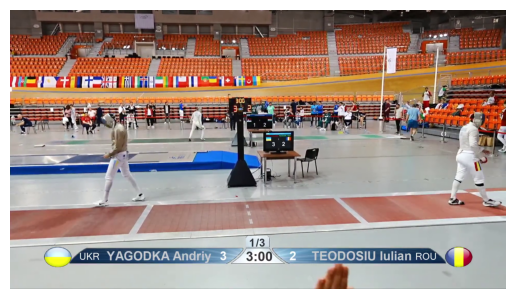

In [ ]:
from google.colab import drive
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Mount Google Drive
drive.mount('/content/drive')

# Path to the video file in your Google Drive
video_path = '/content/drive/MyDrive/Plovdiv ECH 2023 Day02 - Piste Red.mp4'

# Open the video file
cap = cv2.VideoCapture(video_path)

# Get the total number of frames in the video
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# Select a random frame number
random_frame_number = np.random.randint(0, total_frames)

# Set the video capture to the random frame number
cap.set(cv2.CAP_PROP_POS_FRAMES, random_frame_number)

# Read the frame
ret, frame = cap.read()

# Display the frame
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


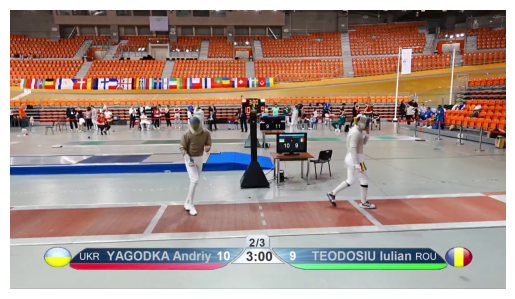

In [ ]:
from google.colab import drive
import cv2
import matplotlib.pyplot as plt

# Mount Google Drive
drive.mount('/content/drive')

# Path to the video file in your Google Drive
video_path = '/content/drive/MyDrive/Plovdiv ECH 2023 Day02 - Piste Red.mp4'

# Open the video file
cap = cv2.VideoCapture(video_path)

# Set the video capture to the desired frame number (344430)
cap.set(cv2.CAP_PROP_POS_FRAMES, 344430)

# Read the frame
ret, frame = cap.read()

# Display the frame
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


In [ ]:
from google.colab import drive
import cv2
import os

# Mount Google Drive
drive.mount('/content/drive')

# Path to the video file in your Google Drive
video_path = '/content/drive/MyDrive/Plovdiv ECH 2023 Day02 - Piste Red.mp4'

# Open the video file
cap = cv2.VideoCapture(video_path)

# Set the video capture to the desired frame number (344430)
cap.set(cv2.CAP_PROP_POS_FRAMES, 344430)

# Read the frame
ret, frame = cap.read()

# Define the region of interest coordinates
red_light_coords = (420, 985, 425, 1000)  # (x1, y1, x2, y2)
green_light_coords = (1275, 985, 1280, 1000)  # (x1, y1, x2, y2)

# Extract the regions of interest
red_light = frame[red_light_coords[1]:red_light_coords[3], red_light_coords[0]:red_light_coords[2]]
green_light = frame[green_light_coords[1]:green_light_coords[3], green_light_coords[0]:green_light_coords[2]]

# Create the "images" folder in your Google Drive if it doesn't exist
folder_path = '/content/drive/MyDrive/images'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

# Save the extracted regions as images in the "images" folder
cv2.imwrite(os.path.join(folder_path, 'Red_Light_Low.jpg'), red_light)
cv2.imwrite(os.path.join(folder_path, 'Green_Light_Low.jpg'), green_light)

# Release the video capture and print success message
cap.release()
print("Images saved successfully.")


Mounted at /content/drive
Images saved successfully.


In [ ]:
import cv2
import csv

# Path to the video file
video_path = '/content/drive/MyDrive/Plovdiv ECH 2023 Day02 - Piste Red.mp4'

# Path to the images for comparison
red_light_image_path = '/content/drive/MyDrive/images/Red_Light.jpg'
green_light_image_path = '/content/drive/MyDrive/images/Green_Light.jpg'

# Define the region of interest coordinates
red_light_coords = (420, 985, 425, 1000)  # (x1, y1, x2, y2)
green_light_coords = (1275, 985, 1280, 1000)  # (x1, y1, x2, y2)

# Set the frame intervals and duration for capturing frames
frame_interval = 10
duration_frames = 90  # 3 seconds assuming 30 frames per second

# Open the video file
cap = cv2.VideoCapture(video_path)

# Get the total number of frames in the video
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# Initialize the CSV file and write the header
csv_file_path = '/content/drive/MyDrive/clips.csv'
with open(csv_file_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Starting_Frame', 'Middle_Frame', 'Last_Frame'])

    # Initialize the last recorded clip's ending frame
    last_clip_end_frame = -1

    # Iterate over the frames
    for frame_num in range(0, total_frames, frame_interval):
        # Set the video capture to the current frame
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_num)

        # Read the frame
        ret, frame = cap.read()

        # Check if the pixels in the regions of interest are similar to the reference images
        red_light_roi = frame[red_light_coords[1]:red_light_coords[3], red_light_coords[0]:red_light_coords[2]]
        green_light_roi = frame[green_light_coords[1]:green_light_coords[3], green_light_coords[0]:green_light_coords[2]]

        red_light_ref = cv2.imread(red_light_image_path)
        green_light_ref = cv2.imread(green_light_image_path)

        if cv2.absdiff(red_light_roi, red_light_ref).mean() < 10 or cv2.absdiff(green_light_roi, green_light_ref).mean() < 10:
            # Calculate the starting and last frames for the desired duration
            starting_frame = max(0, frame_num - duration_frames)
            last_frame = min(total_frames - 1, frame_num + duration_frames)

            # Check for non-overlapping clips
            if starting_frame > last_clip_end_frame:
                # Write the frame numbers to the CSV file
                writer.writerow([starting_frame, frame_num, last_frame])

                # Update the last recorded clip's ending frame
                last_clip_end_frame = last_frame

# Release the video capture and print success message
cap.release()
print("Clips information saved successfully in the CSV file.")


FileNotFoundError: ignored

In [ ]:
from google.colab import drive
import matplotlib.pyplot as plt

# Mount Google Drive
drive.mount('/content/drive')
import cv2
import csv

# Path to the video file
video_path = '/content/drive/MyDrive/Plovdiv ECH 2023 Day02 - Piste Red.mp4'

# Path to the images for comparison
red_light_image_path = '/content/drive/MyDrive/images/Red_Light.jpg'
green_light_image_path = '/content/drive/MyDrive/images/Green_Light.jpg'

# Define the region of interest coordinates
red_light_coords = (420, 985, 425, 1000)  # (x1, y1, x2, y2)
green_light_coords = (1275, 985, 1280, 1000)  # (x1, y1, x2, y2)

# Set the frame intervals and duration for capturing frames
frame_interval = 30
duration_frames = 90  # 3 seconds assuming 30 frames per second

# Open the video file
cap = cv2.VideoCapture(video_path)

# Get the total number of frames in the video
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# Initialize the CSV file and write the header
csv_file_path = '/content/drive/MyDrive/clips.csv'
with open(csv_file_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Starting_Frame', 'Middle_Frame', 'Last_Frame'])

    # Initialize the last recorded clip's ending frame
    last_clip_end_frame = -1

    # Iterate over the frames
    for frame_num in range(0, total_frames, frame_interval):
        # Set the video capture to the current frame
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_num)

        # Read the frame
        ret, frame = cap.read()

        # Check if the pixels in the regions of interest are similar to the reference images
        red_light_roi = frame[red_light_coords[1]:red_light_coords[3], red_light_coords[0]:red_light_coords[2]]
        green_light_roi = frame[green_light_coords[1]:green_light_coords[3], green_light_coords[0]:green_light_coords[2]]

        red_light_ref = cv2.imread(red_light_image_path)
        green_light_ref = cv2.imread(green_light_image_path)

        if cv2.absdiff(red_light_roi, red_light_ref).mean() < 10 or cv2.absdiff(green_light_roi, green_light_ref).mean() < 10:
            # Calculate the starting and last frames for the desired duration
            starting_frame = max(0, frame_num - duration_frames)
            last_frame = min(total_frames - 1, frame_num + duration_frames)

            # Check for non-overlapping clips
            if starting_frame > last_clip_end_frame:
                # Write the frame numbers to the CSV file
                writer.writerow([starting_frame, frame_num, last_frame])

                # Update the last recorded clip's ending frame
                last_clip_end_frame = last_frame

        # Print progress every 500 frames
        if frame_num % 500 == 0:
            progress_percent = (frame_num / total_frames) * 100
            print(f"Frames analyzed: {frame_num}/{total_frames} ({progress_percent:.2f}%)")

# Release the video capture and print success message
cap.release()
print("Clips information saved successfully in the CSV file.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Frames analyzed: 0/779916 (0.00%)
Frames analyzed: 1500/779916 (0.19%)
Frames analyzed: 3000/779916 (0.38%)
Frames analyzed: 4500/779916 (0.58%)
Frames analyzed: 6000/779916 (0.77%)
Frames analyzed: 7500/779916 (0.96%)
Frames analyzed: 9000/779916 (1.15%)
Frames analyzed: 10500/779916 (1.35%)
Frames analyzed: 12000/779916 (1.54%)
Frames analyzed: 13500/779916 (1.73%)
Frames analyzed: 15000/779916 (1.92%)
Frames analyzed: 16500/779916 (2.12%)
Frames analyzed: 18000/779916 (2.31%)
Frames analyzed: 19500/779916 (2.50%)
Frames analyzed: 21000/779916 (2.69%)
Frames analyzed: 22500/779916 (2.88%)
Frames analyzed: 24000/779916 (3.08%)
Frames analyzed: 25500/779916 (3.27%)
Frames analyzed: 27000/779916 (3.46%)
Frames analyzed: 28500/779916 (3.65%)
Frames analyzed: 30000/779916 (3.85%)
Frames analyzed: 31500/779916 (4.04%)
Frames analyzed: 33000/779916 (4.23%)
Frames 

In [ ]:
import cv2
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Path to the video file
video_path = '/content/drive/MyDrive/video.mp4'

# Set the pixel coordinates for cropping
x1, y1 = 909, 935
x2, y2 = 942, 978

# Open the video file
cap = cv2.VideoCapture(video_path)

# Set the desired frame number
desired_frame_num = 329010

# Set the desired frame number in the video capture
cap.set(cv2.CAP_PROP_POS_FRAMES, desired_frame_num)

# Read the frame at the desired frame number
ret, frame = cap.read()

# Check if the desired frame was successfully read
if ret:
    # Crop the frame using the specified coordinates
    cropped_frame = frame[y1:y2, x1:x2]

    # Path to the output folder in Google Drive
    output_folder = '/content/drive/MyDrive/images/'

    # Save the cropped frame as an image in the output folder
    output_path = output_folder + 'cropped_frame.jpg'
    cv2.imwrite(output_path, cropped_frame)

    print('Image saved successfully.')
else:
    print('Error: Desired frame could not be read.')

# Release the video capture
cap.release()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Error: Desired frame could not be read.


In [ ]:
import cv2
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Path to the video file
video_path = '/content/drive/MyDrive/video.mp4'

# Set the pixel coordinates for cropping
x1, y1 = 909, 935
x2, y2 = 942, 978

# Open the video file
cap = cv2.VideoCapture(video_path)

# Set the desired frame number
desired_frame_num = 329010

# Read frames until the desired frame is reached
current_frame_num = 0
while current_frame_num < desired_frame_num:
    ret, frame = cap.read()
    if not ret:
        break
    current_frame_num += 1

# Check if the desired frame was successfully read
if current_frame_num == desired_frame_num:
    # Crop the frame using the specified coordinates
    cropped_frame = frame[y1:y2, x1:x2]

    # Path to the output folder in Google Drive
    output_folder = '/content/drive/MyDrive/images/'

    # Save the cropped frame as an image in the output folder
    output_path = output_folder + 'cropped_frame.jpg'
    cv2.imwrite(output_path, cropped_frame)

    print('Image saved successfully.')
else:
    print('Error: Desired frame could not be read.')

# Release the video capture
cap.release()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Error: Desired frame could not be read.


In [ ]:
import cv2
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Path to the video file
video_path = '/content/drive/MyDrive/Plovdiv ECH 2023 Day02 - Piste Red.mp4'

# Set the pixel coordinates for cropping
x1, y1 = 909, 935
x2, y2 = 942, 978

# Open the video file
cap = cv2.VideoCapture(video_path)

# Set the desired frame number
desired_frame_num = 329010

# Set the desired frame number in the video capture
cap.set(cv2.CAP_PROP_POS_FRAMES, desired_frame_num)

# Read the frame at the desired frame number
ret, frame = cap.read()

# Check if the desired frame was successfully read
if ret:
    # Crop the frame using the specified coordinates
    cropped_frame = frame[y1:y2, x1:x2]

    # Path to the output folder in Google Drive
    output_folder = '/content/drive/MyDrive/images/'

    # Save the cropped frame as an image in the output folder
    output_path = output_folder + 'cropped_frame.jpg'
    cv2.imwrite(output_path, cropped_frame)

    print('Image saved successfully.')
else:
    print('Error: Desired frame could not be read.')

# Release the video capture
cap.release()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Image saved successfully.


In [ ]:
import pandas as pd
import cv2

# Load the existing CSV file into a DataFrame
csv_path = '/content/drive/MyDrive/clips.csv'
df = pd.read_csv(csv_path)

# Path to the image for comparison
image_path = '/content/drive/MyDrive/images/Time_3.jpg'

# Set the pixel coordinates for comparison
x1, y1 = 909, 935
x2, y2 = 942, 978

# Iterate over each row in the DataFrame
for index, row in df.iterrows():
    middle_frame = row['Middle_Frame']

    # Read the middle frame image
    cap = cv2.VideoCapture('/content/drive/MyDrive/video.mp4')
    cap.set(cv2.CAP_PROP_POS_FRAMES, middle_frame)
    ret, frame = cap.read()
    cap.release()

    # Crop the middle frame using the specified coordinates
    cropped_frame = frame[y1:y2, x1:x2]

    # Read the comparison image
    comparison_image = cv2.imread(image_path)

    # Compare the cropped frame with the comparison image
    similarity = cv2.matchTemplate(cropped_frame, comparison_image, cv2.TM_CCOEFF_NORMED)

    # Set the weapon column based on the similarity result
    if similarity >= 0.95:
        df.at[index, 'weapon'] = 'Saber'
    else:
        df.at[index, 'weapon'] = 'Epee'

# Save the modified DataFrame back to the CSV file
df.to_csv(csv_path, index=False)

print('CSV file updated successfully.')


TypeError: ignored

In [ ]:
import pandas as pd
import cv2

# Load the existing CSV file into a DataFrame
csv_path = '/content/drive/MyDrive/clips.csv'
df = pd.read_csv(csv_path)

# Path to the video file
video_path = '/content/drive/MyDrive/Plovdiv ECH 2023 Day02 - Piste Red.mp4'

# Path to the image for comparison
image_path = '/content/drive/MyDrive/images/Time_3.jpg'

# Set the pixel coordinates for comparison
x1, y1 = 909, 935
x2, y2 = 942, 978

# Iterate over each row in the DataFrame
for index, row in df.iterrows():
    middle_frame = row['Middle_Frame']

    # Read the middle frame image
    cap = cv2.VideoCapture(video_path)
    cap.set(cv2.CAP_PROP_POS_FRAMES, middle_frame)
    ret, frame = cap.read()
    cap.release()

    # Crop the middle frame using the specified coordinates
    cropped_frame = frame[y1:y2, x1:x2]

    # Read the comparison image
    comparison_image = cv2.imread(image_path)

    # Compare the cropped frame with the comparison image
    similarity = cv2.matchTemplate(cropped_frame, comparison_image, cv2.TM_CCOEFF_NORMED)

    # Set the weapon column based on the similarity result
    if similarity >= 0.95:
        df.at[index, 'weapon'] = 'Saber'
    else:
        df.at[index, 'weapon'] = 'Epee'

# Save the modified DataFrame back to the CSV file
df.to_csv(csv_path, index=False)

print('CSV file updated successfully.')


CSV file updated successfully.


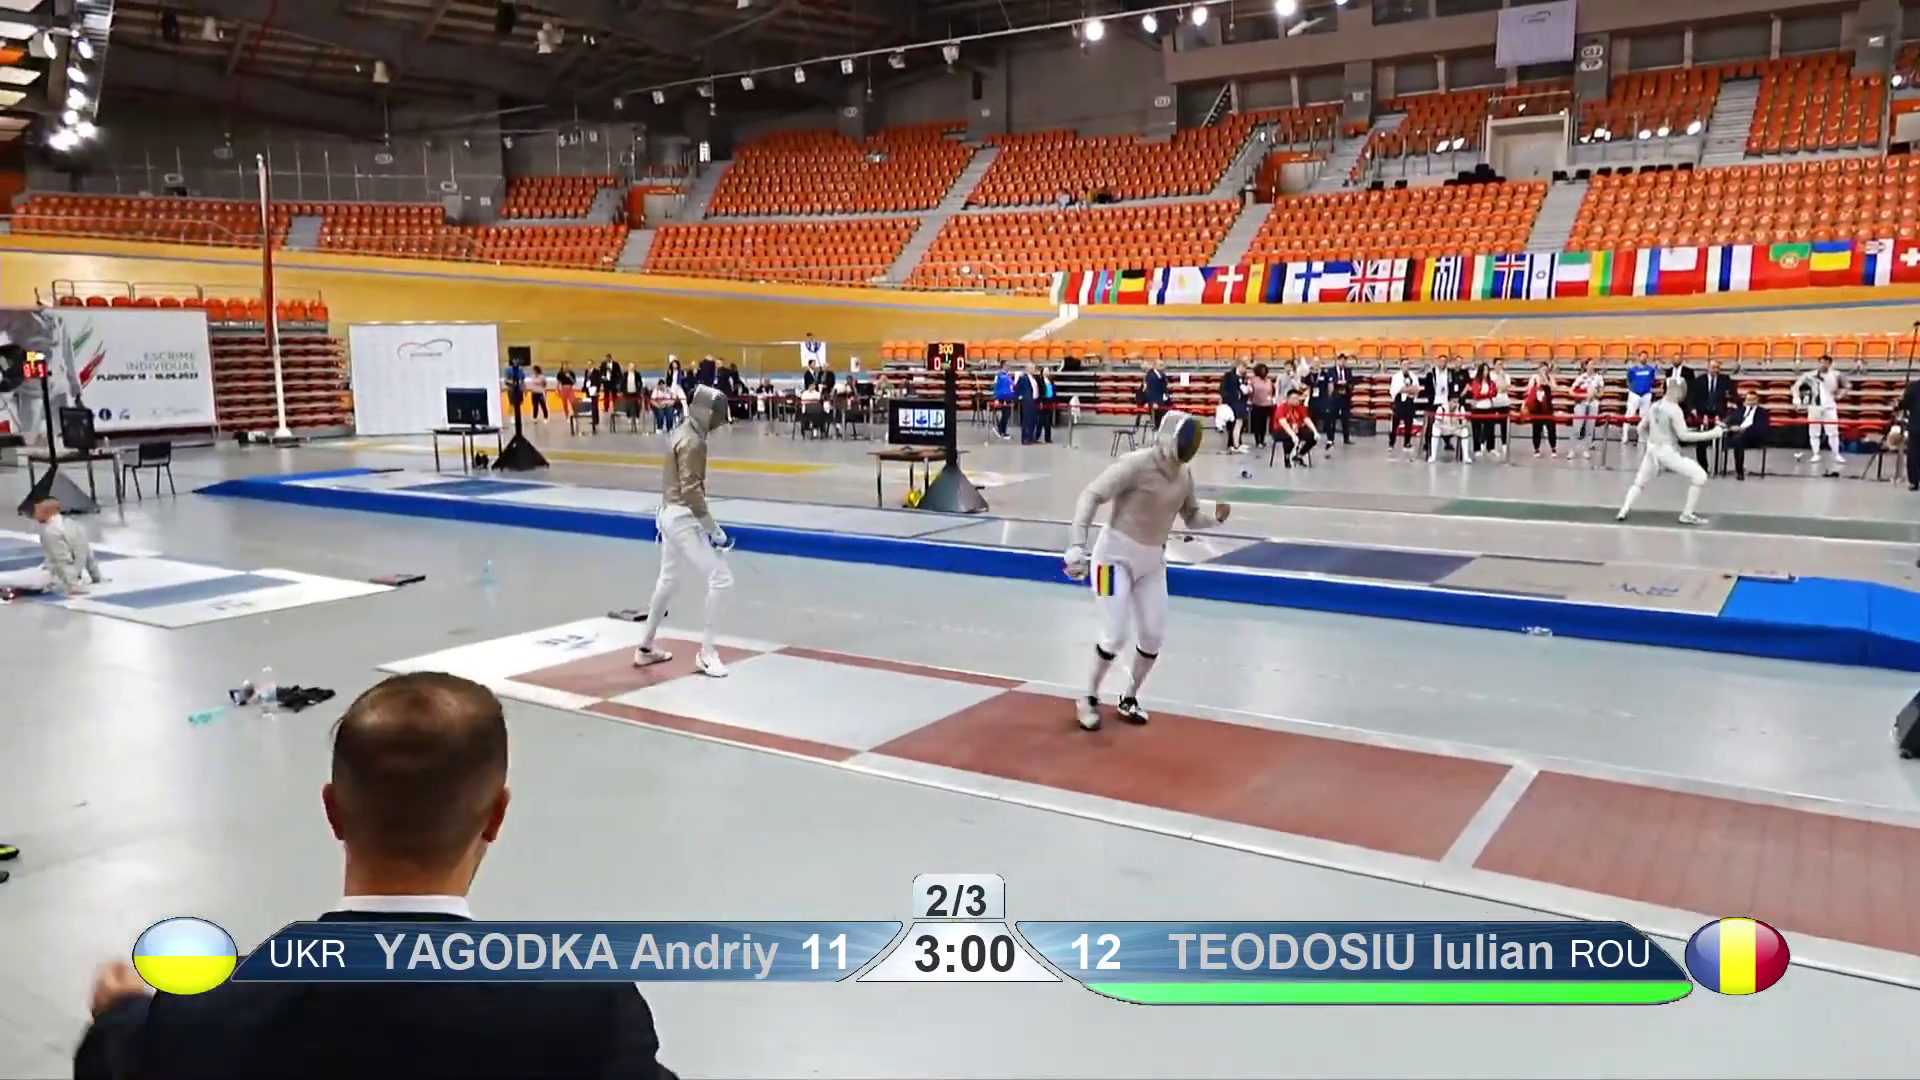

In [ ]:
from google.colab.patches import cv2_imshow
import cv2

# Path to the video file
video_path = '/content/drive/MyDrive/Plovdiv ECH 2023 Day02 - Piste Red.mp4'

# Set the desired frame number
desired_frame_num = 347250

# Open the video file
cap = cv2.VideoCapture(video_path)

# Set the desired frame number in the video capture
cap.set(cv2.CAP_PROP_POS_FRAMES, desired_frame_num)

# Read the frame at the desired frame number
ret, frame = cap.read()

# Check if the frame was successfully read
if ret:
    # Display the frame
    cv2_imshow(frame)
else:
    print('Error: Desired frame could not be read.')

# Release the video capture
cap.release()


In [ ]:
import pandas as pd

# Path to the CSV file
csv_path = '/content/drive/MyDrive/clips.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(csv_path)

# Iterate over each row in the DataFrame
for index, row in df.iterrows():
    current_weapon = row['weapon']
    if current_weapon == 'Saber':
        count_saber = 1
        for i in range(index + 1, index + 11):
            if i < len(df):
                if df.at[i, 'weapon'] == 'Saber':
                    count_saber += 1
        if count_saber < 8:
            df.at[index, 'weapon'] = 'Epee'

# Save the modified DataFrame back to the CSV file
df.to_csv(csv_path, index=False)

print('CSV file updated successfully.')


CSV file updated successfully.


In [ ]:
import cv2
import pandas as pd

# Path to the video file
video_path = '/content/drive/MyDrive/Plovdiv ECH 2023 Day02 - Piste Red.mp4'

# Path to the CSV file
csv_path = '/content/drive/MyDrive/clips.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(csv_path)

# Iterate over the first 50 rows in the DataFrame
for index, row in df.head(50).iterrows():
    middle_frame = row['Middle_Frame']
    start_frame = row['Starting_Frame']
    last_frame = row['Last_Frame']

    # Open the video file
    cap = cv2.VideoCapture(video_path)

    # Set the middle frame number in the video capture
    cap.set(cv2.CAP_PROP_POS_FRAMES, middle_frame)

    # Read the middle frame
    ret, frame = cap.read()

    # Check if the frame was successfully read
    if ret:
        # Extract the specified pixel range
        extracted_image = frame[931:975, 790:846]

        # Generate the image file name
        image_filename = f"temp_frame_{middle_frame}.jpg"

        # Save the image in the "images/temp" folder
        cv2.imwrite(f"/content/drive/MyDrive/images/temp/{image_filename}", extracted_image)

    # Release the video capture
    cap.release()

print("Images extracted and saved successfully.")


Images extracted and saved successfully.


In [ ]:
import cv2
import os
import pandas as pd

# Path to the video file
video_path = '/content/drive/MyDrive/Plovdiv ECH 2023 Day02 - Piste Red.mp4'

# Path to the CSV file
csv_path = '/content/drive/MyDrive/clips.csv'

# Path to the output folder
output_folder = '/content/drive/MyDrive/images/temp'

# Check if the output folder exists, create it if necessary
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Load the CSV file into a DataFrame
df = pd.read_csv(csv_path)

# Iterate over the first 50 rows in the DataFrame
for index, row in df.head(50).iterrows():
    middle_frame = row['Middle_Frame']
    start_frame = row['Starting_Frame']
    last_frame = row['Last_Frame']

    # Open the video file
    cap = cv2.VideoCapture(video_path)

    # Set the middle frame number in the video capture
    cap.set(cv2.CAP_PROP_POS_FRAMES, middle_frame)

    # Read the middle frame
    ret, frame = cap.read()

    # Check if the frame was successfully read
    if ret:
        # Extract the specified pixel range
        extracted_image = frame[931:975, 790:846]

        # Generate the image file name
        image_filename = f"temp_frame_{middle_frame}.jpg"

        # Save the image in the output folder


In [ ]:
import cv2
import pandas as pd

# Path to the video file
video_path = '/content/drive/MyDrive/Plovdiv ECH 2023 Day02 - Piste Red.mp4'

# Path to the CSV file
csv_path = '/content/drive/MyDrive/clips.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(csv_path)

# Iterate over rows 51 to 100 in the DataFrame
for index, row in df.iloc[150:200].iterrows():
    middle_frame = row['Middle_Frame']
    start_frame = row['Starting_Frame']
    last_frame = row['Last_Frame']

    # Open the video file
    cap = cv2.VideoCapture(video_path)

    # Set the middle frame number in the video capture
    cap.set(cv2.CAP_PROP_POS_FRAMES, middle_frame)

    # Read the middle frame
    ret, frame = cap.read()

    # Check if the frame was successfully read
    if ret:
        # Extract the specified pixel range
        extracted_image = frame[931:975, 790:846]

        # Generate the image file name
        image_filename = f"temp_frame_{middle_frame}.jpg"

        # Save the image in the "images/temp" folder
        cv2.imwrite(f"/content/drive/MyDrive/images/temp/{image_filename}", extracted_image)

    # Release the video capture
    cap.release()

print("Images extracted and saved successfully.")


KeyboardInterrupt: ignored

In [ ]:
import cv2
import pandas as pd

# Path to the video file
video_path = '/content/drive/MyDrive/Plovdiv ECH 2023 Day02 - Piste Red.mp4'

# Path to the CSV file
csv_path = '/content/drive/MyDrive/clips.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(csv_path)

# Iterate over rows 1 to 100 in the DataFrame
for index, row in df.iloc[1:101].iterrows():
    middle_frame = row['Middle_Frame']

    # Open the video file
    cap = cv2.VideoCapture(video_path)

    # Set the middle frame number in the video capture
    cap.set(cv2.CAP_PROP_POS_FRAMES, middle_frame)

    # Read the middle frame
    ret, frame = cap.read()

    # Check if the frame was successfully read
    if ret:
        # Extract the specified pixel range
        extracted_image = frame[925:975, 1050:1150]

        # Generate the image file name
        image_filename = f"temp_frame_{middle_frame}.jpg"

        # Save the image in the "images/temp" folder
        cv2.imwrite(f"/content/drive/MyDrive/images/temp/{image_filename}", extracted_image)

    # Release the video capture
    cap.release()

print("Images extracted and saved successfully.")


Images extracted and saved successfully.


In [ ]:
import pandas as pd

# Path to the CSV file
csv_path = '/content/drive/MyDrive/clips.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(csv_path)

# Add the new columns to the DataFrame
df['Left_Score'] = ""
df['Right_Score'] = ""
df['Touch'] = ""

# Save the modified DataFrame back to the CSV file
df.to_csv(csv_path, index=False)

print("Columns added to clips.csv.")


Columns added to clips.csv.


In [ ]:
import cv2
import os
import pandas as pd
import numpy as np

# Path to the video file
video_path = '/content/drive/MyDrive/Plovdiv ECH 2023 Day02 - Piste Red.mp4'

# Path to the CSV file
csv_path = '/content/drive/MyDrive/clips.csv'

# Path to the image folder
image_folder = '/content/drive/MyDrive/images/Left_Score'

# Load the CSV file into a DataFrame
df = pd.read_csv(csv_path)

# Iterate over each row in the DataFrame
for index, row in df.iterrows():
    middle_frame = row['Middle_Frame']

    # Open the video file
    cap = cv2.VideoCapture(video_path)

    # Set the middle frame number in the video capture
    cap.set(cv2.CAP_PROP_POS_FRAMES, middle_frame)

    # Read the middle frame
    ret, frame = cap.read()

    # Check if the frame was successfully read
    if ret:
        # Extract the specified pixel range
        extracted_image = frame[931:975, 790:846]

        # Initialize variables for the closest match
        closest_match = ""
        closest_distance = np.inf

        # Iterate over the images in the folder
        for filename in os.listdir(image_folder):
            # Read the image from the folder
            image_path = os.path.join(image_folder, filename)
            image = cv2.imread(image_path)

            # Calculate the difference between the extracted image and the folder image
            difference = np.sum(np.abs(extracted_image - image))

            # Update the closest match if a better match is found
            if difference < closest_distance:
                closest_match = filename
                closest_distance = difference

        # Update the "Left_Score" column with the closest match
        df.at[index, 'Left_Score'] = os.path.splitext(closest_match)[0]

    # Release the video capture
    cap.release()

# Save the modified DataFrame back to the CSV file
df.to_csv(csv_path, index=False)

print("Left_Score column updated.")


Left_Score column updated.


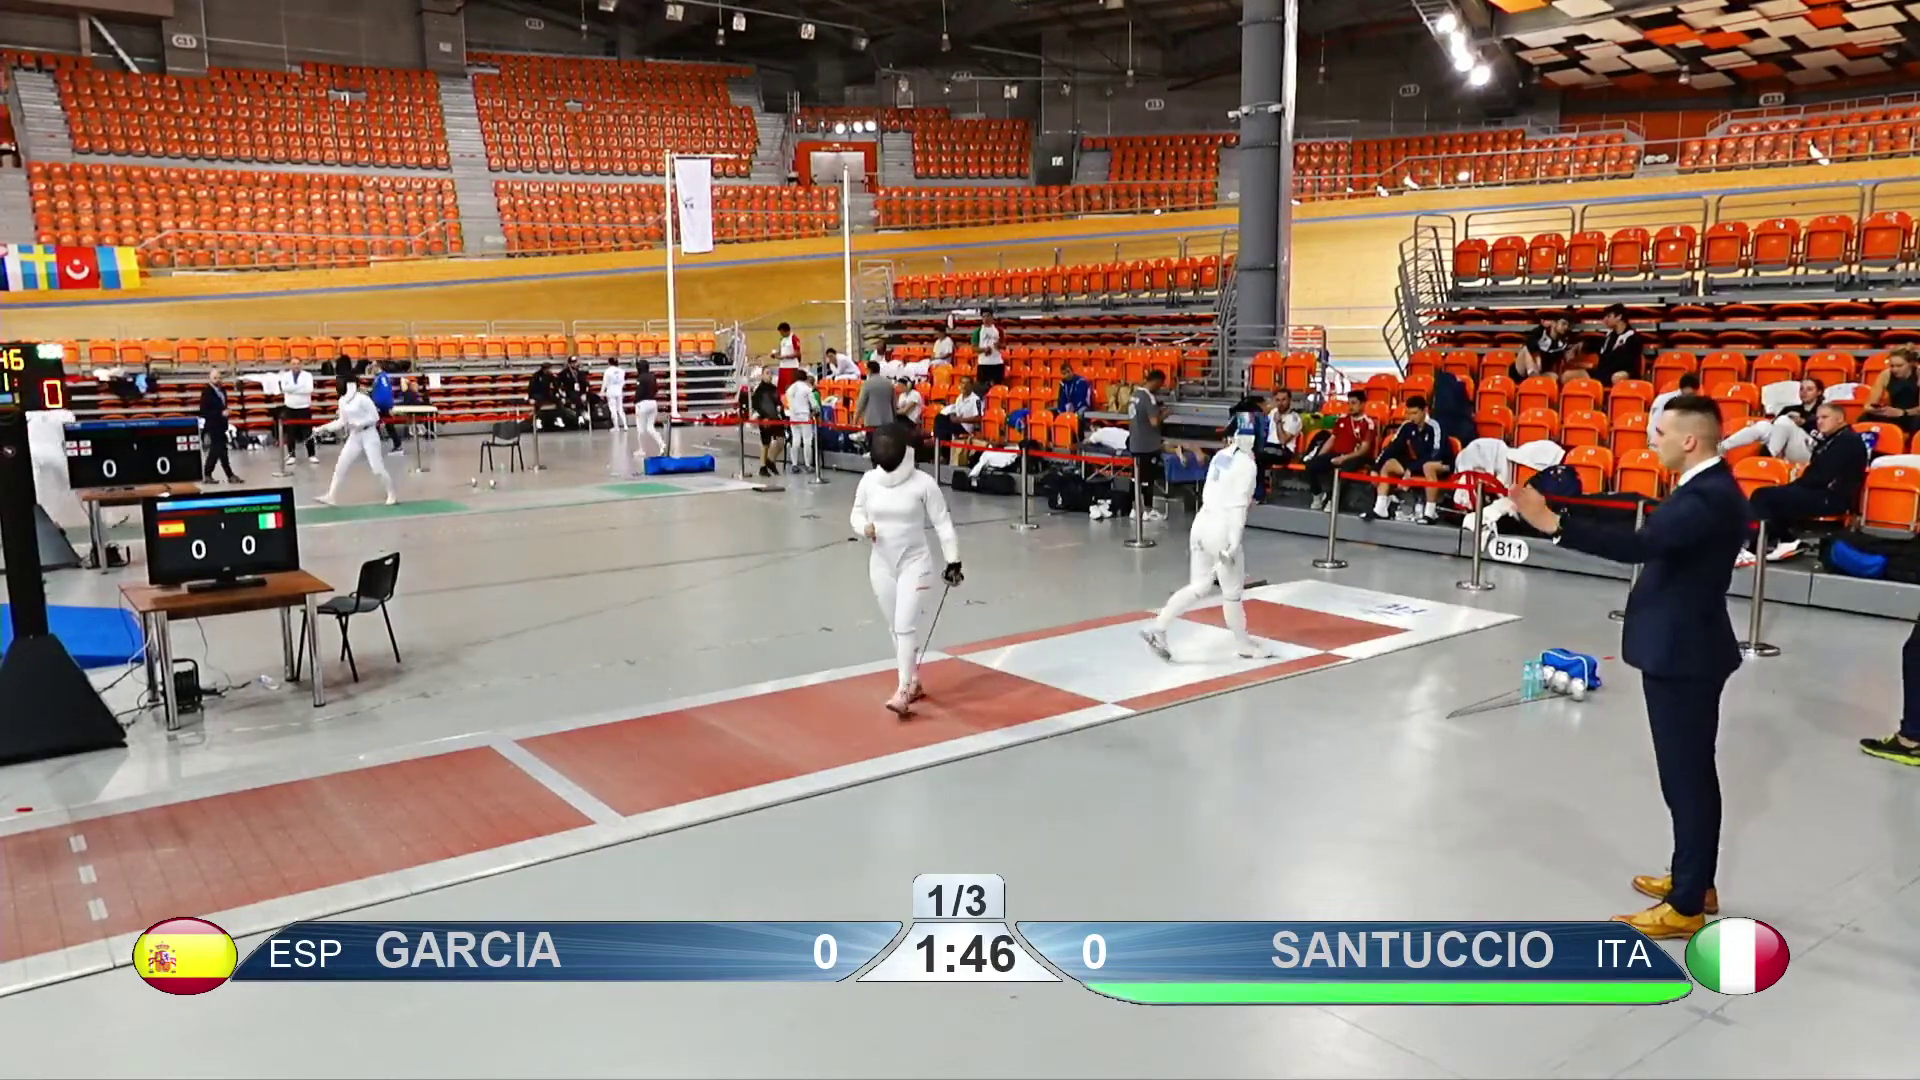

In [ ]:
from google.colab.patches import cv2_imshow
import cv2

# Path to the video file
video_path = '/content/drive/MyDrive/Plovdiv ECH 2023 Day02 - Piste Red.mp4'

# Open the video file
cap = cv2.VideoCapture(video_path)

# Set the frame number to 91770
cap.set(cv2.CAP_PROP_POS_FRAMES, 2940)

# Read the frame
ret, frame = cap.read()

# Check if the frame was successfully read
if ret:
    # Display the frame
    cv2_imshow(frame)

# Release the video capture
cap.release()


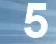

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# Path to the video file
video_path = '/content/drive/MyDrive/Plovdiv ECH 2023 Day02 - Piste Red.mp4'

# Open the video file
cap = cv2.VideoCapture(video_path)

# Set the frame number to 84510
cap.set(cv2.CAP_PROP_POS_FRAMES, 84510)

# Read the frame
ret, frame = cap.read()

# Check if the frame was successfully read
if ret:
    # Extract the specified pixel range
    extracted_image = frame[931:975, 790:846]

    # Display the extracted image
    cv2_imshow(extracted_image)

# Release the video capture
cap.release()


In [ ]:
import cv2
import os
import pandas as pd
import numpy as np
from skimage.metrics import structural_similarity as ssim

# Path to the video file
video_path = '/content/drive/MyDrive/Plovdiv ECH 2023 Day02 - Piste Red.mp4'

# Path to the CSV file
csv_path = '/content/drive/MyDrive/clips.csv'

# Path to the image folder
image_folder = '/content/drive/MyDrive/images/Left_Score'

# Load the CSV file into a DataFrame
df = pd.read_csv(csv_path)

# Iterate over each row in the DataFrame
for index, row in df.iterrows():
    middle_frame = row['Middle_Frame']

    # Open the video file
    cap = cv2.VideoCapture(video_path)

    # Set the middle frame number in the video capture
    cap.set(cv2.CAP_PROP_POS_FRAMES, middle_frame)

    # Read the middle frame
    ret, frame = cap.read()

    # Check if the frame was successfully read
    if ret:
        # Extract the specified pixel range
        extracted_image = frame[931:975, 790:846]

        # Initialize variables for the closest match
        closest_match = ""
        closest_ssim = -np.inf

        # Iterate over the images in the folder
        for filename in os.listdir(image_folder):
            # Read the image from the folder
            image_path = os.path.join(image_folder, filename)
            image = cv2.imread(image_path)

            # Calculate the SSIM between the extracted image and the folder image
            image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            extracted_gray = cv2.cvtColor(extracted_image, cv2.COLOR_BGR2GRAY)
            similarity = ssim(extracted_gray, image_gray)

            # Update the closest match if a better match is found
            if similarity > closest_ssim:
                closest_match = filename
                closest_ssim = similarity

        # Update the "Left_Score" column with the closest match
        df.at[index, 'Left_Score'] = os.path.splitext(closest_match)[0]

    # Release the video capture
    cap.release()

# Save the modified DataFrame back to the CSV file
df.to_csv(csv_path, index=False)

print("Left_Score column updated.")


Left_Score column updated.


In [ ]:
import cv2
import os
import pandas as pd
import numpy as np
from skimage.metrics import structural_similarity as ssim

# Path to the video file
video_path = '/content/drive/MyDrive/Plovdiv ECH 2023 Day02 - Piste Red.mp4'

# Path to the CSV file
csv_path = '/content/drive/MyDrive/clips.csv'

# Path to the image folder for Right_Score
image_folder = '/content/drive/MyDrive/images/Right_Score'

# Load the CSV file into a DataFrame
df = pd.read_csv(csv_path)

# Iterate over each row in the DataFrame
for index, row in df.iterrows():
    middle_frame = row['Middle_Frame']

    # Open the video file
    cap = cv2.VideoCapture(video_path)

    # Set the middle frame number in the video capture
    cap.set(cv2.CAP_PROP_POS_FRAMES, middle_frame)

    # Read the middle frame
    ret, frame = cap.read()

    # Check if the frame was successfully read
    if ret:
        # Extract the specified pixel range
        extracted_image = frame[925:975, 1050:1150]

        # Initialize variables for the closest match
        closest_match = ""
        closest_ssim = -np.inf

        # Iterate over the images in the folder
        for filename in os.listdir(image_folder):
            # Read the image from the folder
            image_path = os.path.join(image_folder, filename)
            image = cv2.imread(image_path)

            # Calculate the SSIM between the extracted image and the folder image
            image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            extracted_gray = cv2.cvtColor(extracted_image, cv2.COLOR_BGR2GRAY)
            similarity = ssim(extracted_gray, image_gray)

            # Update the closest match if a better match is found
            if similarity > closest_ssim:
                closest_match = filename
                closest_ssim = similarity

        # Update the "Right_Score" column with the closest match
        df.at[index, 'Right_Score'] = os.path.splitext(closest_match)[0]

    # Release the video capture
    cap.release()

    # Print a message for every 25 rows
    if (index + 1) % 25 == 0:
        print(f"Processed {index + 1} rows.")

# Save the modified DataFrame back to the CSV file
df.to_csv(csv_path, index=False)

print("Right_Score column updated.")


Processed 25 rows.
Processed 50 rows.
Processed 75 rows.
Processed 100 rows.
Processed 125 rows.
Processed 150 rows.
Processed 175 rows.
Processed 200 rows.
Processed 225 rows.
Processed 250 rows.
Processed 275 rows.
Processed 300 rows.
Processed 325 rows.
Processed 350 rows.
Processed 375 rows.
Processed 400 rows.
Processed 425 rows.
Processed 450 rows.
Processed 475 rows.
Processed 500 rows.
Processed 525 rows.
Processed 550 rows.
Processed 575 rows.
Processed 600 rows.
Processed 625 rows.
Right_Score column updated.


In [ ]:
import pandas as pd

# Path to the CSV file
csv_path = '/content/drive/MyDrive/clips.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(csv_path)

# Iterate over each row in the DataFrame (except the last row)
for index, row in df[:-1].iterrows():
    left_score = row['Left_Score']
    right_score = row['Right_Score']
    next_left_score = df.at[index + 1, 'Left_Score']
    next_right_score = df.at[index + 1, 'Right_Score']
    weapon = row['weapon']

    if left_score is None or right_score is None:
        df.at[index, 'Touch'] = 'N/A'
    elif weapon == 'epee':
        if next_left_score is None or next_right_score is None:
            df.at[index, 'Touch'] = 'N/A'
        elif next_left_score > left_score and next_right_score > right_score:
            df.at[index, 'Touch'] = 'Double'
        else:
            df.at[index, 'Touch'] = 'None'
    else:
        if next_left_score is None or next_right_score is None:
            df.at[index, 'Touch'] = 'N/A'
        elif next_left_score - left_score == 1 and next_right_score - right_score == 0:
            df.at[index, 'Touch'] = 'Left'
        elif next_left_score - left_score == 0 and next_right_score - right_score == 1:
            df.at[index, 'Touch'] = 'Right'
        else:
            df.at[index, 'Touch'] = 'None'

# Save the modified DataFrame back to the CSV file
df.to_csv(csv_path, index=False)

print("Touch column updated.")


Touch column updated.


In [ ]:
import cv2
import os

# Path to the video file
video_path = '/content/drive/MyDrive/Plovdiv ECH 2023 Day02 - Piste Red.mp4'

# Output video file name and path
output_path = '/content/drive/MyDrive/output_video.mp4'

# Frame range for the video clip
start_frame = 466050
end_frame = -1  # Use -1 to include all frames until the end

# Open the video file
cap = cv2.VideoCapture(video_path)

# Set the start frame number in the video capture
cap.set(cv2.CAP_PROP_POS_FRAMES, start_frame)

# Get the frame width and height
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_path, fourcc, 30.0, (frame_width, frame_height))

# Read frames and write to the output video
frame_count = 0
while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Write the frame to the output video
    out.write(frame)

    frame_count += 1

    # Break if reached the end frame or end of video
    if end_frame > 0 and frame_count >= end_frame:
        break

# Release the video capture and video writer
cap.release()
out.release()

print("Video clip created and saved to Google Drive.")


KeyboardInterrupt: ignored

In [ ]:
import cv2
import moviepy.editor as mp
import os

# Path to the video file
video_path = '/content/drive/MyDrive/Plovdiv ECH 2023 Day02 - Piste Red.mp4'

# Output directory for the video clip
output_directory = '/content/drive/MyDrive/output_videos/'

# Check if the output directory exists, create it if necessary
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Middle frame of the video clip
middle_frame = 466050

# Duration of video clip before and after the middle frame (in seconds)
duration_before = 2.0
duration_after = 1.0

# Load the video file
video = cv2.VideoCapture(video_path)

# Get the frame rate (FPS) of the video
video_fps = video.get(cv2.CAP_PROP_FPS)

# Calculate start and end times for the video clip
start_time = max(0, middle_frame / video_fps - duration_before)
end_time = (middle_frame + 1) / video_fps + duration_after

# Use moviepy to create the video clip
clip = mp.VideoFileClip(video_path).subclip(start_time, end_time)

# Output file name based on the middle frame
output_filename = f"output_{middle_frame}.mp4"

# Output file path
output_path = os.path.join(output_directory, output_filename)

# Save the video clip to the output file
clip.write_videofile(output_path, codec='libx264')

print("Video clip created and saved to Google Drive.")


t:   2%|▏         | 2/91 [01:19<58:54, 39.71s/it, now=None]

Moviepy - Building video /content/drive/MyDrive/output_videos/output_466050.mp4.
MoviePy - Writing audio in output_466050TEMP_MPY_wvf_snd.mp3



t:   2%|▏         | 2/91 [01:20<59:34, 40.17s/it, now=None]

MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_466050.mp4




t:   2%|▏         | 2/91 [01:35<1:10:35, 47.59s/it, now=None]

Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_466050.mp4
Video clip created and saved to Google Drive.


In [ ]:
from google.colab import drive
import csv
import os

# Mount Google Drive
drive.mount('/content/drive')

# Path to the clips.csv file in your Google Drive
csv_file_path = '/content/drive/MyDrive/clips.csv'

# Read the existing data from the clips.csv file
rows = []
with open(csv_file_path, 'r') as file:
    csv_reader = csv.reader(file)
    rows = list(csv_reader)

# Add the new columns to the header row
header_row = rows[0]
header_row.extend(['Left_Light', 'Right_Light'])

# Update the existing rows with empty values for the new columns
for row in rows[1:]:
    row.extend(['', ''])

# Write the updated data back to the clips.csv file
with open(csv_file_path, 'w', newline='') as file:
    csv_writer = csv.writer(file)
    csv_writer.writerows(rows)

print("Columns added successfully.")


Mounted at /content/drive
Columns added successfully.


In [ ]:
import cv2
import os
import csv

# Define the region of interest coordinates
red_light_coords = (296, 985, 640, 1000)  # (x1, y1, x2, y2)
green_light_coords = (1209, 985, 1515, 1000)  # (x1, y1, x2, y2)

# Load the reference images
red_light_reference = cv2.imread('/content/drive/MyDrive/images/Red_Light.jpg')
green_light_reference = cv2.imread('/content/drive/MyDrive/images/Green_Light.jpg')

# Path to the video file in your Google Drive
video_path = '/content/drive/MyDrive/Plovdiv ECH 2023 Day02 - Piste Red.mp4'

# Open the video file
cap = cv2.VideoCapture(video_path)

# Read the data from the clips.csv file
rows = []
with open('/content/drive/MyDrive/clips.csv', 'r') as file:
    csv_reader = csv.reader(file)
    rows = list(csv_reader)

# Get the column indices for start, middle, and end frames
header = rows[0]
start_frame_idx = header.index('Starting_Frame')
middle_frame_idx = header.index('Middle_Frame')
end_frame_idx = header.index('Last_Frame')
weapon_idx = header.index('weapon')

# Calculate the total number of rows
total_rows = len(rows) - 1

# Iterate through each row (starting from the second row)
for row_num, row in enumerate(rows[1:], 1):
    # Extract the relevant information from the row
    try:
        start_frame = int(row[start_frame_idx])
        middle_frame = int(row[middle_frame_idx])
        end_frame = int(row[end_frame_idx])
        weapon = row[weapon_idx]
    except ValueError:
        # Skip the row if the values are not valid integers
        continue

    # Check if the weapon is "Saber"
    if weapon == "Saber":
        # Iterate from 30 frames prior to the middle frame
        for frame_num in range(middle_frame - 30, middle_frame + 11):
            # Set the video capture to the desired frame number
            cap.set(cv2.CAP_PROP_POS_FRAMES, frame_num)

            # Read the frame and extract the regions of interest
            ret, frame = cap.read()
            red_light_roi = frame[red_light_coords[1]:red_light_coords[3], red_light_coords[0]:red_light_coords[2]]
            green_light_roi = frame[green_light_coords[1]:green_light_coords[3], green_light_coords[0]:green_light_coords[2]]

            # Compare the regions with the reference images
            red_light_match = cv2.matchTemplate(red_light_roi, red_light_reference, cv2.TM_CCOEFF_NORMED)
            green_light_match = cv2.matchTemplate(green_light_roi, green_light_reference, cv2.TM_CCOEFF_NORMED)

            # Define a threshold for the similarity match
            threshold = 0.8

            # Check if both lights are detected
            if cv2.minMaxLoc(red_light_match)[1] >= threshold and cv2.minMaxLoc(green_light_match)[1] >= threshold:
                break  # Skip analyzing remaining frames for this row

            # Check if the red light is detected
            if cv2.minMaxLoc(red_light_match)[1] >= threshold:
                row.append(frame_num)  # Update the "Left_Light" column

            # Check if the green light is detected
            if cv2.minMaxLoc(green_light_match)[1] >= threshold:
                row.append(frame_num)  # Update the "Right_Light" column

        # Calculate progress percentage based on row number
        progress_percentage = (row_num / total_rows) * 100

        # Print progress
        if row_num % 10 == 0:
            print(f"Processed rows: {row_num}, Total rows: {total_rows}, Progress: {progress_percentage}%")

# Save the updated rows to the clips.csv file
with open('/content/drive/MyDrive/clips.csv', 'w', newline='') as file:
    csv_writer = csv.writer(file)
    csv_writer.writerows(rows)


Processed rows: 10, Total rows: 646, Progress: 1.5479876160990713%
Processed rows: 70, Total rows: 646, Progress: 10.8359133126935%
Processed rows: 130, Total rows: 646, Progress: 20.123839009287924%
Processed rows: 210, Total rows: 646, Progress: 32.50773993808049%
Processed rows: 300, Total rows: 646, Progress: 46.43962848297213%
Processed rows: 310, Total rows: 646, Progress: 47.987616099071204%
Processed rows: 320, Total rows: 646, Progress: 49.53560371517028%
Processed rows: 330, Total rows: 646, Progress: 51.08359133126935%
Processed rows: 370, Total rows: 646, Progress: 57.27554179566563%
Processed rows: 380, Total rows: 646, Progress: 58.82352941176471%
Processed rows: 390, Total rows: 646, Progress: 60.371517027863774%
Processed rows: 400, Total rows: 646, Progress: 61.91950464396285%
Processed rows: 410, Total rows: 646, Progress: 63.46749226006192%
Processed rows: 420, Total rows: 646, Progress: 65.01547987616098%
Processed rows: 430, Total rows: 646, Progress: 66.5634674922

In [ ]:
import cv2
import os
import csv

# Define the region of interest coordinates
red_light_coords = (296, 985, 640, 1000)  # (x1, y1, x2, y2)
green_light_coords = (1209, 985, 1515, 1000)  # (x1, y1, x2, y2)

# Load the reference images
red_light_reference = cv2.imread('/content/drive/MyDrive/images/Red_Light.jpg', cv2.IMREAD_GRAYSCALE)
green_light_reference = cv2.imread('/content/drive/MyDrive/images/Green_Light.jpg', cv2.IMREAD_GRAYSCALE)

# Path to the video file in your Google Drive
video_path = '/content/drive/MyDrive/Plovdiv ECH 2023 Day02 - Piste Red.mp4'

# Open the video file
cap = cv2.VideoCapture(video_path)

# Read the data from the clips.csv file
rows = []
with open('/content/drive/MyDrive/clips.csv', 'r') as file:
    csv_reader = csv.reader(file)
    rows = list(csv_reader)

# Add the "Left_Light" and "Right_Light" columns to the header
header = rows[0]
header.extend(["Left_Light", "Right_Light"])

# Get the column indices for start, middle, end frames, and weapon
start_frame_idx = header.index('Starting_Frame')
middle_frame_idx = header.index('Middle_Frame')
end_frame_idx = header.index('Last_Frame')
weapon_idx = header.index('weapon')

# Calculate the total number of rows
total_rows = len(rows) - 1

# Iterate through each row (starting from the second row)
for i, row in enumerate(rows[1:], 1):
    # Extract the relevant information from the row
    start_frame = int(row[start_frame_idx])
    middle_frame = int(row[middle_frame_idx])
    end_frame = int(row[end_frame_idx])
    weapon = row[weapon_idx]

    # Skip the row if the weapon is not "Saber"
    if weapon != "Saber":
        continue

    # Set initial values for left and right lights
    left_light_frame = None
    right_light_frame = None

    # Iterate through frames from start to end
    for frame_num in range(start_frame, end_frame + 1):
        # Set the video capture to the desired frame number
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_num)

        # Read the frame and convert it to grayscale
        ret, frame = cap.read()
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Extract the regions of interest
        red_light_roi = gray_frame[red_light_coords[1]:red_light_coords[3], red_light_coords[0]:red_light_coords[2]]
        green_light_roi = gray_frame[green_light_coords[1]:green_light_coords[3], green_light_coords[0]:green_light_coords[2]]

        # Compare the regions with the reference images
        red_light_match = cv2.matchTemplate(red_light_roi, red_light_reference, cv2.TM_CCOEFF_NORMED)
        green_light_match = cv2.matchTemplate(green_light_roi, green_light_reference, cv2.TM_CCOEFF_NORMED)

        # Define a threshold for the similarity match
        threshold = 0.8

        # Check if the left light is detected
        if cv2.minMaxLoc(red_light_match)[1] >= threshold and left_light_frame is None:
            left_light_frame = frame_num

        # Check if the right light is detected
        if cv2.minMaxLoc(green_light_match)[1] >= threshold and right_light_frame is None:
            right_light_frame = frame_num

        # Break if both lights are detected
        if left_light_frame is not None and right_light_frame is not None:
            break

    # Update the row with the first light frames
    row.extend([left_light_frame, right_light_frame])

    # Print progress
    progress = (i / total_rows) * 100
    print(f"Processing row {i}/{total_rows} - Progress: {progress:.2f}%")

# Save the updated rows to the clips.csv file
with open('/content/drive/MyDrive/clips.csv', 'w', newline='') as file:
    csv_writer = csv.writer(file)
    csv_writer.writerows(rows)


Processing row 8/646 - Progress: 1.24%
Processing row 9/646 - Progress: 1.39%
Processing row 10/646 - Progress: 1.55%
Processing row 11/646 - Progress: 1.70%
Processing row 12/646 - Progress: 1.86%
Processing row 13/646 - Progress: 2.01%
Processing row 19/646 - Progress: 2.94%
Processing row 33/646 - Progress: 5.11%
Processing row 45/646 - Progress: 6.97%
Processing row 65/646 - Progress: 10.06%
Processing row 66/646 - Progress: 10.22%
Processing row 67/646 - Progress: 10.37%
Processing row 68/646 - Progress: 10.53%
Processing row 69/646 - Progress: 10.68%
Processing row 70/646 - Progress: 10.84%
Processing row 71/646 - Progress: 10.99%
Processing row 78/646 - Progress: 12.07%
Processing row 79/646 - Progress: 12.23%
Processing row 88/646 - Progress: 13.62%
Processing row 103/646 - Progress: 15.94%
Processing row 104/646 - Progress: 16.10%
Processing row 105/646 - Progress: 16.25%
Processing row 129/646 - Progress: 19.97%
Processing row 130/646 - Progress: 20.12%
Processing row 155/646

In [ ]:
import cv2
import moviepy.editor as mp
import os

# Path to the video file
video_path = '/content/drive/MyDrive/Plovdiv ECH 2023 Day02 - Piste Red.mp4'

# Output directory for the video clip
output_directory = '/content/drive/MyDrive/output_videos/'

# Check if the output directory exists, create it if necessary
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Read the data from the clips.csv file
rows = []
with open('/content/drive/MyDrive/clips.csv', 'r') as file:
    csv_reader = csv.reader(file)
    rows = list(csv_reader)

# Iterate through each row (starting from the second row)
for row in rows[1:]:
    # Extract the relevant information from the row
    weapon = row[weapon_idx]

    # Skip the row if the weapon is not "Saber"
    if weapon != "Saber":
        continue

    # Get the middle frame from the row
    middle_frame = int(row[middle_frame_idx])

    # Duration of video clip before and after the middle frame (in seconds)
    duration_before = 2.0
    duration_after = 1.0

    # Load the video file
    video = cv2.VideoCapture(video_path)

    # Get the frame rate (FPS) of the video
    video_fps = video.get(cv2.CAP_PROP_FPS)

    # Calculate start and end times for the video clip
    start_time = max(0, middle_frame / video_fps - duration_before)
    end_time = (middle_frame + 1) / video_fps + duration_after

    # Use moviepy to create the video clip
    clip = mp.VideoFileClip(video_path).subclip(start_time, end_time)

    # Output file name based on the middle frame
    output_filename = f"output_{middle_frame}.mp4"

    # Output file path
    output_path = os.path.join(output_directory, output_filename)

    # Save the video clip to the output file
    clip.write_videofile(output_path, codec='libx264')

    print(f"Video clip {output_filename} created and saved to Google Drive.")


Moviepy - Building video /content/drive/MyDrive/output_videos/output_9870.mp4.
MoviePy - Writing audio in output_9870TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_9870.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_9870.mp4
Video clip output_9870.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_10890.mp4.
MoviePy - Writing audio in output_10890TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_10890.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_10890.mp4
Video clip output_10890.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_11100.mp4.
MoviePy - Writing audio in output_11100TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_11100.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_11100.mp4
Video clip output_11100.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_11370.mp4.
MoviePy - Writing audio in output_11370TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_11370.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_11370.mp4
Video clip output_11370.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_12540.mp4.
MoviePy - Writing audio in output_12540TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_12540.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_12540.mp4
Video clip output_12540.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_12930.mp4.
MoviePy - Writing audio in output_12930TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_12930.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_12930.mp4
Video clip output_12930.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_22080.mp4.
MoviePy - Writing audio in output_22080TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_22080.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_22080.mp4
Video clip output_22080.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_34980.mp4.
MoviePy - Writing audio in output_34980TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_34980.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_34980.mp4
Video clip output_34980.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_54570.mp4.
MoviePy - Writing audio in output_54570TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_54570.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_54570.mp4
Video clip output_54570.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_69780.mp4.
MoviePy - Writing audio in output_69780TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_69780.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_69780.mp4
Video clip output_69780.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_70140.mp4.
MoviePy - Writing audio in output_70140TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_70140.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_70140.mp4
Video clip output_70140.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_71040.mp4.
MoviePy - Writing audio in output_71040TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_71040.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_71040.mp4
Video clip output_71040.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_71430.mp4.
MoviePy - Writing audio in output_71430TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_71430.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_71430.mp4
Video clip output_71430.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_71850.mp4.
MoviePy - Writing audio in output_71850TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_71850.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_71850.mp4
Video clip output_71850.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_72150.mp4.
MoviePy - Writing audio in output_72150TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_72150.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_72150.mp4
Video clip output_72150.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_72360.mp4.
MoviePy - Writing audio in output_72360TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_72360.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_72360.mp4
Video clip output_72360.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_81810.mp4.
MoviePy - Writing audio in output_81810TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_81810.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_81810.mp4
Video clip output_81810.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_82050.mp4.
MoviePy - Writing audio in output_82050TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_82050.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_82050.mp4
Video clip output_82050.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_92730.mp4.
MoviePy - Writing audio in output_92730TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_92730.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_92730.mp4
Video clip output_92730.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_106980.mp4.
MoviePy - Writing audio in output_106980TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_106980.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_106980.mp4
Video clip output_106980.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_108180.mp4.
MoviePy - Writing audio in output_108180TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_108180.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_108180.mp4
Video clip output_108180.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_108480.mp4.
MoviePy - Writing audio in output_108480TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_108480.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_108480.mp4
Video clip output_108480.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_135690.mp4.
MoviePy - Writing audio in output_135690TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_135690.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_135690.mp4
Video clip output_135690.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_135990.mp4.
MoviePy - Writing audio in output_135990TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_135990.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_135990.mp4
Video clip output_135990.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_162870.mp4.
MoviePy - Writing audio in output_162870TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_162870.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_162870.mp4
Video clip output_162870.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_164370.mp4.
MoviePy - Writing audio in output_164370TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_164370.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_164370.mp4
Video clip output_164370.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_174240.mp4.
MoviePy - Writing audio in output_174240TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_174240.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_174240.mp4
Video clip output_174240.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_202350.mp4.
MoviePy - Writing audio in output_202350TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_202350.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_202350.mp4
Video clip output_202350.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_202650.mp4.
MoviePy - Writing audio in output_202650TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_202650.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_202650.mp4
Video clip output_202650.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_211410.mp4.
MoviePy - Writing audio in output_211410TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_211410.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_211410.mp4
Video clip output_211410.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_221220.mp4.
MoviePy - Writing audio in output_221220TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_221220.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_221220.mp4
Video clip output_221220.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_233610.mp4.
MoviePy - Writing audio in output_233610TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_233610.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_233610.mp4
Video clip output_233610.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_233910.mp4.
MoviePy - Writing audio in output_233910TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_233910.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_233910.mp4
Video clip output_233910.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_234810.mp4.
MoviePy - Writing audio in output_234810TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_234810.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_234810.mp4
Video clip output_234810.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_261780.mp4.
MoviePy - Writing audio in output_261780TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_261780.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_261780.mp4
Video clip output_261780.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_261990.mp4.
MoviePy - Writing audio in output_261990TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_261990.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_261990.mp4
Video clip output_261990.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_262650.mp4.
MoviePy - Writing audio in output_262650TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_262650.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_262650.mp4
Video clip output_262650.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_262950.mp4.
MoviePy - Writing audio in output_262950TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_262950.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_262950.mp4
Video clip output_262950.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_290310.mp4.
MoviePy - Writing audio in output_290310TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_290310.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_290310.mp4
Video clip output_290310.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_290730.mp4.
MoviePy - Writing audio in output_290730TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_290730.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_290730.mp4
Video clip output_290730.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_291030.mp4.
MoviePy - Writing audio in output_291030TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_291030.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_291030.mp4
Video clip output_291030.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_310980.mp4.
MoviePy - Writing audio in output_310980TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_310980.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_310980.mp4
Video clip output_310980.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_329490.mp4.
MoviePy - Writing audio in output_329490TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_329490.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_329490.mp4
Video clip output_329490.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_334500.mp4.
MoviePy - Writing audio in output_334500TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_334500.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_334500.mp4
Video clip output_334500.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_334710.mp4.
MoviePy - Writing audio in output_334710TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_334710.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_334710.mp4
Video clip output_334710.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_334980.mp4.
MoviePy - Writing audio in output_334980TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_334980.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_334980.mp4
Video clip output_334980.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_335280.mp4.
MoviePy - Writing audio in output_335280TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_335280.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_335280.mp4
Video clip output_335280.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_335700.mp4.
MoviePy - Writing audio in output_335700TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_335700.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_335700.mp4
Video clip output_335700.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_336060.mp4.
MoviePy - Writing audio in output_336060TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_336060.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_336060.mp4
Video clip output_336060.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_336480.mp4.
MoviePy - Writing audio in output_336480TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_336480.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_336480.mp4
Video clip output_336480.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_337140.mp4.
MoviePy - Writing audio in output_337140TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_337140.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_337140.mp4
Video clip output_337140.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_337500.mp4.
MoviePy - Writing audio in output_337500TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_337500.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_337500.mp4
Video clip output_337500.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_337890.mp4.
MoviePy - Writing audio in output_337890TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_337890.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_337890.mp4
Video clip output_337890.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_338190.mp4.
MoviePy - Writing audio in output_338190TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_338190.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_338190.mp4
Video clip output_338190.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_338520.mp4.
MoviePy - Writing audio in output_338520TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_338520.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_338520.mp4
Video clip output_338520.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_338820.mp4.
MoviePy - Writing audio in output_338820TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_338820.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_338820.mp4
Video clip output_338820.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_339900.mp4.
MoviePy - Writing audio in output_339900TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_339900.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_339900.mp4
Video clip output_339900.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_342240.mp4.
MoviePy - Writing audio in output_342240TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_342240.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_342240.mp4
Video clip output_342240.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_342840.mp4.
MoviePy - Writing audio in output_342840TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_342840.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_342840.mp4
Video clip output_342840.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_343170.mp4.
MoviePy - Writing audio in output_343170TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_343170.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_343170.mp4
Video clip output_343170.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_343590.mp4.
MoviePy - Writing audio in output_343590TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_343590.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_343590.mp4
Video clip output_343590.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_343920.mp4.
MoviePy - Writing audio in output_343920TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_343920.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_343920.mp4
Video clip output_343920.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_344400.mp4.
MoviePy - Writing audio in output_344400TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_344400.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_344400.mp4
Video clip output_344400.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_344820.mp4.
MoviePy - Writing audio in output_344820TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_344820.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_344820.mp4
Video clip output_344820.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_345210.mp4.
MoviePy - Writing audio in output_345210TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_345210.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_345210.mp4
Video clip output_345210.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_345720.mp4.
MoviePy - Writing audio in output_345720TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_345720.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_345720.mp4
Video clip output_345720.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_346860.mp4.
MoviePy - Writing audio in output_346860TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_346860.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_346860.mp4
Video clip output_346860.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_347250.mp4.
MoviePy - Writing audio in output_347250TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_347250.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_347250.mp4
Video clip output_347250.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_347730.mp4.
MoviePy - Writing audio in output_347730TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_347730.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_347730.mp4
Video clip output_347730.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_348240.mp4.
MoviePy - Writing audio in output_348240TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_348240.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_348240.mp4
Video clip output_348240.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_348690.mp4.
MoviePy - Writing audio in output_348690TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_348690.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_348690.mp4
Video clip output_348690.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_364500.mp4.
MoviePy - Writing audio in output_364500TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_364500.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_364500.mp4
Video clip output_364500.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_365400.mp4.
MoviePy - Writing audio in output_365400TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_365400.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_365400.mp4
Video clip output_365400.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_383490.mp4.
MoviePy - Writing audio in output_383490TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_383490.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_383490.mp4
Video clip output_383490.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_401190.mp4.
MoviePy - Writing audio in output_401190TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_401190.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_401190.mp4
Video clip output_401190.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_440970.mp4.
MoviePy - Writing audio in output_440970TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_440970.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_440970.mp4
Video clip output_440970.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_441390.mp4.
MoviePy - Writing audio in output_441390TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_441390.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_441390.mp4
Video clip output_441390.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_441600.mp4.
MoviePy - Writing audio in output_441600TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_441600.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_441600.mp4
Video clip output_441600.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_441810.mp4.
MoviePy - Writing audio in output_441810TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_441810.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_441810.mp4
Video clip output_441810.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_442200.mp4.
MoviePy - Writing audio in output_442200TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_442200.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_442200.mp4
Video clip output_442200.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_442440.mp4.
MoviePy - Writing audio in output_442440TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_442440.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_442440.mp4
Video clip output_442440.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_442680.mp4.
MoviePy - Writing audio in output_442680TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_442680.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_442680.mp4
Video clip output_442680.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_442920.mp4.
MoviePy - Writing audio in output_442920TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_442920.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_442920.mp4
Video clip output_442920.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_443220.mp4.
MoviePy - Writing audio in output_443220TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_443220.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_443220.mp4
Video clip output_443220.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_443490.mp4.
MoviePy - Writing audio in output_443490TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_443490.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_443490.mp4
Video clip output_443490.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_443760.mp4.
MoviePy - Writing audio in output_443760TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_443760.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_443760.mp4
Video clip output_443760.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_444150.mp4.
MoviePy - Writing audio in output_444150TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_444150.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_444150.mp4
Video clip output_444150.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_444510.mp4.
MoviePy - Writing audio in output_444510TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_444510.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_444510.mp4
Video clip output_444510.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_444720.mp4.
MoviePy - Writing audio in output_444720TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_444720.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_444720.mp4
Video clip output_444720.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_445440.mp4.
MoviePy - Writing audio in output_445440TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_445440.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_445440.mp4
Video clip output_445440.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_447510.mp4.
MoviePy - Writing audio in output_447510TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_447510.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_447510.mp4
Video clip output_447510.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_447810.mp4.
MoviePy - Writing audio in output_447810TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_447810.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_447810.mp4
Video clip output_447810.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_448710.mp4.
MoviePy - Writing audio in output_448710TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_448710.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_448710.mp4
Video clip output_448710.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_448980.mp4.
MoviePy - Writing audio in output_448980TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_448980.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_448980.mp4
Video clip output_448980.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_449310.mp4.
MoviePy - Writing audio in output_449310TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_449310.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_449310.mp4
Video clip output_449310.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_449610.mp4.
MoviePy - Writing audio in output_449610TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_449610.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_449610.mp4
Video clip output_449610.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_449910.mp4.
MoviePy - Writing audio in output_449910TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_449910.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_449910.mp4
Video clip output_449910.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_450180.mp4.
MoviePy - Writing audio in output_450180TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_450180.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_450180.mp4
Video clip output_450180.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_450480.mp4.
MoviePy - Writing audio in output_450480TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_450480.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_450480.mp4
Video clip output_450480.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_450810.mp4.
MoviePy - Writing audio in output_450810TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_450810.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_450810.mp4
Video clip output_450810.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_451110.mp4.
MoviePy - Writing audio in output_451110TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_451110.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_451110.mp4
Video clip output_451110.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_451350.mp4.
MoviePy - Writing audio in output_451350TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_451350.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_451350.mp4
Video clip output_451350.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_451590.mp4.
MoviePy - Writing audio in output_451590TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_451590.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_451590.mp4
Video clip output_451590.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_465120.mp4.
MoviePy - Writing audio in output_465120TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_465120.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_465120.mp4
Video clip output_465120.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_465510.mp4.
MoviePy - Writing audio in output_465510TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_465510.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_465510.mp4
Video clip output_465510.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_465840.mp4.
MoviePy - Writing audio in output_465840TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_465840.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_465840.mp4
Video clip output_465840.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_466050.mp4.
MoviePy - Writing audio in output_466050TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_466050.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_466050.mp4
Video clip output_466050.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_466350.mp4.
MoviePy - Writing audio in output_466350TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_466350.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_466350.mp4
Video clip output_466350.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_466800.mp4.
MoviePy - Writing audio in output_466800TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_466800.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_466800.mp4
Video clip output_466800.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_467010.mp4.
MoviePy - Writing audio in output_467010TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_467010.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_467010.mp4
Video clip output_467010.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_467370.mp4.
MoviePy - Writing audio in output_467370TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_467370.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_467370.mp4
Video clip output_467370.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_468030.mp4.
MoviePy - Writing audio in output_468030TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_468030.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_468030.mp4
Video clip output_468030.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_468870.mp4.
MoviePy - Writing audio in output_468870TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_468870.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_468870.mp4
Video clip output_468870.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_470940.mp4.
MoviePy - Writing audio in output_470940TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_470940.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_470940.mp4
Video clip output_470940.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_471360.mp4.
MoviePy - Writing audio in output_471360TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_471360.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_471360.mp4
Video clip output_471360.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_471570.mp4.
MoviePy - Writing audio in output_471570TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_471570.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_471570.mp4
Video clip output_471570.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_471810.mp4.
MoviePy - Writing audio in output_471810TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_471810.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_471810.mp4
Video clip output_471810.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_472080.mp4.
MoviePy - Writing audio in output_472080TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_472080.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_472080.mp4
Video clip output_472080.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_472470.mp4.
MoviePy - Writing audio in output_472470TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_472470.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_472470.mp4
Video clip output_472470.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_472680.mp4.
MoviePy - Writing audio in output_472680TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_472680.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_472680.mp4
Video clip output_472680.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_472920.mp4.
MoviePy - Writing audio in output_472920TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_472920.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_472920.mp4
Video clip output_472920.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_473160.mp4.
MoviePy - Writing audio in output_473160TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_473160.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_473160.mp4
Video clip output_473160.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_473370.mp4.
MoviePy - Writing audio in output_473370TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_473370.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_473370.mp4
Video clip output_473370.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_478050.mp4.
MoviePy - Writing audio in output_478050TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_478050.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_478050.mp4
Video clip output_478050.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_478740.mp4.
MoviePy - Writing audio in output_478740TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_478740.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_478740.mp4
Video clip output_478740.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_478950.mp4.
MoviePy - Writing audio in output_478950TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_478950.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_478950.mp4
Video clip output_478950.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_479250.mp4.
MoviePy - Writing audio in output_479250TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_479250.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_479250.mp4
Video clip output_479250.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_479520.mp4.
MoviePy - Writing audio in output_479520TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_479520.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_479520.mp4
Video clip output_479520.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_479940.mp4.
MoviePy - Writing audio in output_479940TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_479940.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_479940.mp4
Video clip output_479940.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_480270.mp4.
MoviePy - Writing audio in output_480270TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_480270.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_480270.mp4
Video clip output_480270.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_480660.mp4.
MoviePy - Writing audio in output_480660TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_480660.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_480660.mp4
Video clip output_480660.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_481590.mp4.
MoviePy - Writing audio in output_481590TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_481590.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_481590.mp4
Video clip output_481590.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_481980.mp4.
MoviePy - Writing audio in output_481980TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_481980.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_481980.mp4
Video clip output_481980.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_482310.mp4.
MoviePy - Writing audio in output_482310TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_482310.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_482310.mp4
Video clip output_482310.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_482700.mp4.
MoviePy - Writing audio in output_482700TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_482700.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_482700.mp4
Video clip output_482700.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_482910.mp4.
MoviePy - Writing audio in output_482910TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_482910.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_482910.mp4
Video clip output_482910.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_483510.mp4.
MoviePy - Writing audio in output_483510TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_483510.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_483510.mp4
Video clip output_483510.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_489570.mp4.
MoviePy - Writing audio in output_489570TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_489570.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_489570.mp4
Video clip output_489570.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_490110.mp4.
MoviePy - Writing audio in output_490110TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_490110.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_490110.mp4
Video clip output_490110.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_490470.mp4.
MoviePy - Writing audio in output_490470TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_490470.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_490470.mp4
Video clip output_490470.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_490860.mp4.
MoviePy - Writing audio in output_490860TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_490860.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_490860.mp4
Video clip output_490860.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_491310.mp4.
MoviePy - Writing audio in output_491310TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_491310.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_491310.mp4
Video clip output_491310.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_491790.mp4.
MoviePy - Writing audio in output_491790TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_491790.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_491790.mp4
Video clip output_491790.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_492240.mp4.
MoviePy - Writing audio in output_492240TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_492240.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_492240.mp4
Video clip output_492240.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_492870.mp4.
MoviePy - Writing audio in output_492870TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_492870.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_492870.mp4
Video clip output_492870.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_493470.mp4.
MoviePy - Writing audio in output_493470TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_493470.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_493470.mp4
Video clip output_493470.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_494610.mp4.
MoviePy - Writing audio in output_494610TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_494610.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_494610.mp4
Video clip output_494610.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_495900.mp4.
MoviePy - Writing audio in output_495900TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_495900.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_495900.mp4
Video clip output_495900.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_496650.mp4.
MoviePy - Writing audio in output_496650TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_496650.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_496650.mp4
Video clip output_496650.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_498000.mp4.
MoviePy - Writing audio in output_498000TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_498000.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_498000.mp4
Video clip output_498000.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_500100.mp4.
MoviePy - Writing audio in output_500100TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_500100.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_500100.mp4
Video clip output_500100.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_500520.mp4.
MoviePy - Writing audio in output_500520TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_500520.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_500520.mp4
Video clip output_500520.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_501630.mp4.
MoviePy - Writing audio in output_501630TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_501630.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_501630.mp4
Video clip output_501630.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_505530.mp4.
MoviePy - Writing audio in output_505530TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_505530.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_505530.mp4
Video clip output_505530.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_506580.mp4.
MoviePy - Writing audio in output_506580TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_506580.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_506580.mp4
Video clip output_506580.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_506790.mp4.
MoviePy - Writing audio in output_506790TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_506790.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_506790.mp4
Video clip output_506790.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_507300.mp4.
MoviePy - Writing audio in output_507300TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_507300.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_507300.mp4
Video clip output_507300.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_507780.mp4.
MoviePy - Writing audio in output_507780TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_507780.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_507780.mp4
Video clip output_507780.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_508860.mp4.
MoviePy - Writing audio in output_508860TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_508860.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_508860.mp4
Video clip output_508860.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_509070.mp4.
MoviePy - Writing audio in output_509070TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_509070.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_509070.mp4
Video clip output_509070.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_509790.mp4.
MoviePy - Writing audio in output_509790TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_509790.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_509790.mp4
Video clip output_509790.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_510300.mp4.
MoviePy - Writing audio in output_510300TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_510300.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_510300.mp4
Video clip output_510300.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_511050.mp4.
MoviePy - Writing audio in output_511050TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_511050.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_511050.mp4
Video clip output_511050.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_511380.mp4.
MoviePy - Writing audio in output_511380TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_511380.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_511380.mp4
Video clip output_511380.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_512400.mp4.
MoviePy - Writing audio in output_512400TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_512400.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_512400.mp4
Video clip output_512400.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_512850.mp4.
MoviePy - Writing audio in output_512850TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_512850.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_512850.mp4
Video clip output_512850.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_513330.mp4.
MoviePy - Writing audio in output_513330TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_513330.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_513330.mp4
Video clip output_513330.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_513870.mp4.
MoviePy - Writing audio in output_513870TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_513870.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_513870.mp4
Video clip output_513870.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_514890.mp4.
MoviePy - Writing audio in output_514890TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_514890.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_514890.mp4
Video clip output_514890.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_515370.mp4.
MoviePy - Writing audio in output_515370TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_515370.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_515370.mp4
Video clip output_515370.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_518520.mp4.
MoviePy - Writing audio in output_518520TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_518520.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_518520.mp4
Video clip output_518520.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_519000.mp4.
MoviePy - Writing audio in output_519000TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_519000.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_519000.mp4
Video clip output_519000.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_519300.mp4.
MoviePy - Writing audio in output_519300TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_519300.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_519300.mp4
Video clip output_519300.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_519630.mp4.
MoviePy - Writing audio in output_519630TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_519630.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_519630.mp4
Video clip output_519630.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_520140.mp4.
MoviePy - Writing audio in output_520140TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_520140.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_520140.mp4
Video clip output_520140.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_520590.mp4.
MoviePy - Writing audio in output_520590TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_520590.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_520590.mp4
Video clip output_520590.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_521340.mp4.
MoviePy - Writing audio in output_521340TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_521340.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_521340.mp4
Video clip output_521340.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_521970.mp4.
MoviePy - Writing audio in output_521970TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_521970.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_521970.mp4
Video clip output_521970.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_522180.mp4.
MoviePy - Writing audio in output_522180TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_522180.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_522180.mp4
Video clip output_522180.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_522840.mp4.
MoviePy - Writing audio in output_522840TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_522840.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_522840.mp4
Video clip output_522840.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_523380.mp4.
MoviePy - Writing audio in output_523380TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_523380.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_523380.mp4
Video clip output_523380.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_523890.mp4.
MoviePy - Writing audio in output_523890TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_523890.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_523890.mp4
Video clip output_523890.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_524460.mp4.
MoviePy - Writing audio in output_524460TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_524460.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_524460.mp4
Video clip output_524460.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_525450.mp4.
MoviePy - Writing audio in output_525450TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_525450.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_525450.mp4
Video clip output_525450.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_526020.mp4.
MoviePy - Writing audio in output_526020TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_526020.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_526020.mp4
Video clip output_526020.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_527040.mp4.
MoviePy - Writing audio in output_527040TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_527040.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_527040.mp4
Video clip output_527040.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_527610.mp4.
MoviePy - Writing audio in output_527610TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_527610.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_527610.mp4
Video clip output_527610.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_528840.mp4.
MoviePy - Writing audio in output_528840TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_528840.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_528840.mp4
Video clip output_528840.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_544920.mp4.
MoviePy - Writing audio in output_544920TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_544920.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_544920.mp4
Video clip output_544920.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_587430.mp4.
MoviePy - Writing audio in output_587430TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_587430.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_587430.mp4
Video clip output_587430.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_587640.mp4.
MoviePy - Writing audio in output_587640TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_587640.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_587640.mp4
Video clip output_587640.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_587850.mp4.
MoviePy - Writing audio in output_587850TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_587850.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_587850.mp4
Video clip output_587850.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_588090.mp4.
MoviePy - Writing audio in output_588090TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_588090.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_588090.mp4
Video clip output_588090.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_589530.mp4.
MoviePy - Writing audio in output_589530TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_589530.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_589530.mp4
Video clip output_589530.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_589890.mp4.
MoviePy - Writing audio in output_589890TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_589890.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_589890.mp4
Video clip output_589890.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_590250.mp4.
MoviePy - Writing audio in output_590250TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_590250.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_590250.mp4
Video clip output_590250.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_591150.mp4.
MoviePy - Writing audio in output_591150TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_591150.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_591150.mp4
Video clip output_591150.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_591570.mp4.
MoviePy - Writing audio in output_591570TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_591570.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_591570.mp4
Video clip output_591570.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_592140.mp4.
MoviePy - Writing audio in output_592140TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_592140.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_592140.mp4
Video clip output_592140.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_592710.mp4.
MoviePy - Writing audio in output_592710TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_592710.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_592710.mp4
Video clip output_592710.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_592980.mp4.
MoviePy - Writing audio in output_592980TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_592980.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_592980.mp4
Video clip output_592980.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_593310.mp4.
MoviePy - Writing audio in output_593310TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_593310.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_593310.mp4
Video clip output_593310.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_593700.mp4.
MoviePy - Writing audio in output_593700TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_593700.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_593700.mp4
Video clip output_593700.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_596040.mp4.
MoviePy - Writing audio in output_596040TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_596040.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_596040.mp4
Video clip output_596040.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_596430.mp4.
MoviePy - Writing audio in output_596430TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_596430.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_596430.mp4
Video clip output_596430.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_596730.mp4.
MoviePy - Writing audio in output_596730TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_596730.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_596730.mp4
Video clip output_596730.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_597300.mp4.
MoviePy - Writing audio in output_597300TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_597300.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_597300.mp4
Video clip output_597300.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_597720.mp4.
MoviePy - Writing audio in output_597720TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_597720.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_597720.mp4
Video clip output_597720.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_598110.mp4.
MoviePy - Writing audio in output_598110TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_598110.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_598110.mp4
Video clip output_598110.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_598620.mp4.
MoviePy - Writing audio in output_598620TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_598620.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_598620.mp4
Video clip output_598620.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_599160.mp4.
MoviePy - Writing audio in output_599160TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_599160.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_599160.mp4
Video clip output_599160.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_599610.mp4.
MoviePy - Writing audio in output_599610TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_599610.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_599610.mp4
Video clip output_599610.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_600090.mp4.
MoviePy - Writing audio in output_600090TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_600090.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_600090.mp4
Video clip output_600090.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_600660.mp4.
MoviePy - Writing audio in output_600660TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_600660.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_600660.mp4
Video clip output_600660.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_600990.mp4.
MoviePy - Writing audio in output_600990TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_600990.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_600990.mp4
Video clip output_600990.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_601500.mp4.
MoviePy - Writing audio in output_601500TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_601500.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_601500.mp4
Video clip output_601500.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_602160.mp4.
MoviePy - Writing audio in output_602160TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_602160.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_602160.mp4
Video clip output_602160.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_602610.mp4.
MoviePy - Writing audio in output_602610TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_602610.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_602610.mp4
Video clip output_602610.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_618180.mp4.
MoviePy - Writing audio in output_618180TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_618180.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_618180.mp4
Video clip output_618180.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_619080.mp4.
MoviePy - Writing audio in output_619080TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_619080.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_619080.mp4
Video clip output_619080.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_619320.mp4.
MoviePy - Writing audio in output_619320TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_619320.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_619320.mp4
Video clip output_619320.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_619680.mp4.
MoviePy - Writing audio in output_619680TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_619680.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_619680.mp4
Video clip output_619680.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_620280.mp4.
MoviePy - Writing audio in output_620280TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_620280.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_620280.mp4
Video clip output_620280.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_620850.mp4.
MoviePy - Writing audio in output_620850TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_620850.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_620850.mp4
Video clip output_620850.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_621360.mp4.
MoviePy - Writing audio in output_621360TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_621360.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_621360.mp4
Video clip output_621360.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_621840.mp4.
MoviePy - Writing audio in output_621840TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_621840.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_621840.mp4
Video clip output_621840.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_622380.mp4.
MoviePy - Writing audio in output_622380TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_622380.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_622380.mp4
Video clip output_622380.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_622950.mp4.
MoviePy - Writing audio in output_622950TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_622950.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_622950.mp4
Video clip output_622950.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_623520.mp4.
MoviePy - Writing audio in output_623520TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_623520.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_623520.mp4
Video clip output_623520.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_623940.mp4.
MoviePy - Writing audio in output_623940TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_623940.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_623940.mp4
Video clip output_623940.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_626850.mp4.
MoviePy - Writing audio in output_626850TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_626850.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_626850.mp4
Video clip output_626850.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_627210.mp4.
MoviePy - Writing audio in output_627210TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_627210.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_627210.mp4
Video clip output_627210.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_627630.mp4.
MoviePy - Writing audio in output_627630TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_627630.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_627630.mp4
Video clip output_627630.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_628380.mp4.
MoviePy - Writing audio in output_628380TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_628380.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_628380.mp4
Video clip output_628380.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_628770.mp4.
MoviePy - Writing audio in output_628770TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_628770.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_628770.mp4
Video clip output_628770.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_629280.mp4.
MoviePy - Writing audio in output_629280TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_629280.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_629280.mp4
Video clip output_629280.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_630600.mp4.
MoviePy - Writing audio in output_630600TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_630600.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_630600.mp4
Video clip output_630600.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_630960.mp4.
MoviePy - Writing audio in output_630960TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_630960.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_630960.mp4
Video clip output_630960.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_631380.mp4.
MoviePy - Writing audio in output_631380TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_631380.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_631380.mp4
Video clip output_631380.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_632100.mp4.
MoviePy - Writing audio in output_632100TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_632100.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_632100.mp4
Video clip output_632100.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_632610.mp4.
MoviePy - Writing audio in output_632610TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_632610.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_632610.mp4
Video clip output_632610.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_633420.mp4.
MoviePy - Writing audio in output_633420TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_633420.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_633420.mp4
Video clip output_633420.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_633870.mp4.
MoviePy - Writing audio in output_633870TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_633870.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_633870.mp4
Video clip output_633870.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_634560.mp4.
MoviePy - Writing audio in output_634560TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_634560.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_634560.mp4
Video clip output_634560.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_635940.mp4.
MoviePy - Writing audio in output_635940TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_635940.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_635940.mp4
Video clip output_635940.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_676590.mp4.
MoviePy - Writing audio in output_676590TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_676590.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_676590.mp4
Video clip output_676590.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_677100.mp4.
MoviePy - Writing audio in output_677100TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_677100.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_677100.mp4
Video clip output_677100.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_677370.mp4.
MoviePy - Writing audio in output_677370TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_677370.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_677370.mp4
Video clip output_677370.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_677640.mp4.
MoviePy - Writing audio in output_677640TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_677640.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_677640.mp4
Video clip output_677640.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_677850.mp4.
MoviePy - Writing audio in output_677850TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_677850.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_677850.mp4
Video clip output_677850.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_678180.mp4.
MoviePy - Writing audio in output_678180TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_678180.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_678180.mp4
Video clip output_678180.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_678510.mp4.
MoviePy - Writing audio in output_678510TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_678510.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_678510.mp4
Video clip output_678510.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_679080.mp4.
MoviePy - Writing audio in output_679080TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_679080.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_679080.mp4
Video clip output_679080.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_679500.mp4.
MoviePy - Writing audio in output_679500TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_679500.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_679500.mp4
Video clip output_679500.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_679830.mp4.
MoviePy - Writing audio in output_679830TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_679830.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_679830.mp4
Video clip output_679830.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_680250.mp4.
MoviePy - Writing audio in output_680250TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_680250.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_680250.mp4
Video clip output_680250.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_681480.mp4.
MoviePy - Writing audio in output_681480TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_681480.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_681480.mp4
Video clip output_681480.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_683490.mp4.
MoviePy - Writing audio in output_683490TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_683490.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_683490.mp4
Video clip output_683490.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_683820.mp4.
MoviePy - Writing audio in output_683820TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_683820.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_683820.mp4
Video clip output_683820.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_684330.mp4.
MoviePy - Writing audio in output_684330TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_684330.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_684330.mp4
Video clip output_684330.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_685410.mp4.
MoviePy - Writing audio in output_685410TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_685410.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_685410.mp4
Video clip output_685410.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_685620.mp4.
MoviePy - Writing audio in output_685620TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_685620.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_685620.mp4
Video clip output_685620.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_685920.mp4.
MoviePy - Writing audio in output_685920TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_685920.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_685920.mp4
Video clip output_685920.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_686490.mp4.
MoviePy - Writing audio in output_686490TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_686490.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_686490.mp4
Video clip output_686490.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_686820.mp4.
MoviePy - Writing audio in output_686820TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_686820.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_686820.mp4
Video clip output_686820.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_687240.mp4.
MoviePy - Writing audio in output_687240TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_687240.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_687240.mp4
Video clip output_687240.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_690390.mp4.
MoviePy - Writing audio in output_690390TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_690390.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_690390.mp4
Video clip output_690390.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_690660.mp4.
MoviePy - Writing audio in output_690660TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_690660.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_690660.mp4
Video clip output_690660.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_691140.mp4.
MoviePy - Writing audio in output_691140TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_691140.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_691140.mp4
Video clip output_691140.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_691530.mp4.
MoviePy - Writing audio in output_691530TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_691530.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_691530.mp4
Video clip output_691530.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_691920.mp4.
MoviePy - Writing audio in output_691920TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_691920.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_691920.mp4
Video clip output_691920.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_692490.mp4.
MoviePy - Writing audio in output_692490TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_692490.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_692490.mp4
Video clip output_692490.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_692730.mp4.
MoviePy - Writing audio in output_692730TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_692730.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_692730.mp4
Video clip output_692730.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_713850.mp4.
MoviePy - Writing audio in output_713850TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_713850.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_713850.mp4
Video clip output_713850.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_714150.mp4.
MoviePy - Writing audio in output_714150TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_714150.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_714150.mp4
Video clip output_714150.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_723240.mp4.
MoviePy - Writing audio in output_723240TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_723240.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_723240.mp4
Video clip output_723240.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_732510.mp4.
MoviePy - Writing audio in output_732510TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_732510.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_732510.mp4
Video clip output_732510.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_759900.mp4.
MoviePy - Writing audio in output_759900TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_759900.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_759900.mp4
Video clip output_759900.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_760500.mp4.
MoviePy - Writing audio in output_760500TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_760500.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_760500.mp4
Video clip output_760500.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_760740.mp4.
MoviePy - Writing audio in output_760740TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_760740.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_760740.mp4
Video clip output_760740.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_761490.mp4.
MoviePy - Writing audio in output_761490TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_761490.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_761490.mp4
Video clip output_761490.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_762030.mp4.
MoviePy - Writing audio in output_762030TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_762030.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_762030.mp4
Video clip output_762030.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_762240.mp4.
MoviePy - Writing audio in output_762240TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_762240.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_762240.mp4
Video clip output_762240.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_762750.mp4.
MoviePy - Writing audio in output_762750TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_762750.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_762750.mp4
Video clip output_762750.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_762960.mp4.
MoviePy - Writing audio in output_762960TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_762960.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_762960.mp4
Video clip output_762960.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_763380.mp4.
MoviePy - Writing audio in output_763380TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_763380.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_763380.mp4
Video clip output_763380.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_763860.mp4.
MoviePy - Writing audio in output_763860TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_763860.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_763860.mp4
Video clip output_763860.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_764070.mp4.
MoviePy - Writing audio in output_764070TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_764070.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_764070.mp4
Video clip output_764070.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_765060.mp4.
MoviePy - Writing audio in output_765060TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_765060.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_765060.mp4
Video clip output_765060.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_765660.mp4.
MoviePy - Writing audio in output_765660TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_765660.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_765660.mp4
Video clip output_765660.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_766590.mp4.
MoviePy - Writing audio in output_766590TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_766590.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_766590.mp4
Video clip output_766590.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_767100.mp4.
MoviePy - Writing audio in output_767100TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_767100.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_767100.mp4
Video clip output_767100.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_767550.mp4.
MoviePy - Writing audio in output_767550TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_767550.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_767550.mp4
Video clip output_767550.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_767760.mp4.
MoviePy - Writing audio in output_767760TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_767760.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_767760.mp4
Video clip output_767760.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_768270.mp4.
MoviePy - Writing audio in output_768270TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_768270.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_768270.mp4
Video clip output_768270.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_770340.mp4.
MoviePy - Writing audio in output_770340TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_770340.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_770340.mp4
Video clip output_770340.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_770580.mp4.
MoviePy - Writing audio in output_770580TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_770580.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_770580.mp4
Video clip output_770580.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_771270.mp4.
MoviePy - Writing audio in output_771270TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_771270.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_771270.mp4
Video clip output_771270.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_771720.mp4.
MoviePy - Writing audio in output_771720TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_771720.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_771720.mp4
Video clip output_771720.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_772200.mp4.
MoviePy - Writing audio in output_772200TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_772200.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_772200.mp4
Video clip output_772200.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_772650.mp4.
MoviePy - Writing audio in output_772650TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_772650.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_772650.mp4
Video clip output_772650.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_773070.mp4.
MoviePy - Writing audio in output_773070TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_773070.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_773070.mp4
Video clip output_773070.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_773550.mp4.
MoviePy - Writing audio in output_773550TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_773550.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_773550.mp4
Video clip output_773550.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_773790.mp4.
MoviePy - Writing audio in output_773790TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_773790.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_773790.mp4
Video clip output_773790.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_774240.mp4.
MoviePy - Writing audio in output_774240TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_774240.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_774240.mp4
Video clip output_774240.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_774750.mp4.
MoviePy - Writing audio in output_774750TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_774750.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_774750.mp4
Video clip output_774750.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_775560.mp4.
MoviePy - Writing audio in output_775560TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_775560.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_775560.mp4
Video clip output_775560.mp4 created and saved to Google Drive.
Moviepy - Building video /content/drive/MyDrive/output_videos/output_775770.mp4.
MoviePy - Writing audio in output_775770TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video /content/drive/MyDrive/output_videos/output_775770.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/output_videos/output_775770.mp4
Video clip output_775770.mp4 created and saved to Google Drive.


In [ ]:
from google.colab import drive
import pandas as pd
import os

# Mount Google Drive
drive.mount('/content/drive')

# Define the path to the clips.csv file
csv_file_path = '/content/drive/MyDrive/clips.csv'

# Define the path to the output_videos directory
videos_directory = '/content/drive/MyDrive/output_videos'

# Load the clips.csv file as a DataFrame
df = pd.read_csv(csv_file_path)

# Iterate over each row in the DataFrame
for index, row in df.iterrows():
    touch_value = row['Touch']
    middle_frame_value = row['Middle_Frame']

    # Check if the Touch value is None
    if touch_value == 'None':
        # Construct the video file name based on the Middle_Frame value
        video_file_name = f"output_{middle_frame_value}.mp4"

        # Construct the path to the video file
        video_file_path = os.path.join(videos_directory, video_file_name)

        # Check if the video file exists
        if os.path.exists(video_file_path):
            # Delete the video file
            os.remove(video_file_path)
            print(f"Deleted video: {video_file_name}")
        else:
            print(f"Video not found: {video_file_name}")


Mounted at /content/drive
Deleted video: output_9870.mp4
Deleted video: output_10890.mp4
Deleted video: output_11100.mp4
Deleted video: output_11370.mp4
Deleted video: output_12540.mp4
Deleted video: output_12930.mp4
Deleted video: output_22080.mp4
Deleted video: output_34980.mp4
Deleted video: output_54570.mp4
Deleted video: output_69780.mp4
Deleted video: output_70140.mp4
Deleted video: output_71040.mp4
Deleted video: output_71430.mp4
Deleted video: output_71850.mp4
Deleted video: output_72150.mp4
Deleted video: output_72360.mp4
Deleted video: output_81810.mp4
Deleted video: output_82050.mp4
Deleted video: output_92730.mp4
Deleted video: output_106980.mp4
Deleted video: output_108180.mp4
Deleted video: output_108480.mp4
Deleted video: output_135690.mp4
Deleted video: output_135990.mp4
Deleted video: output_162870.mp4
Deleted video: output_164370.mp4
Deleted video: output_174240.mp4
Deleted video: output_202350.mp4
Deleted video: output_202650.mp4
Deleted video: output_211410.mp4
Dele

In [ ]:
import pandas as pd

# Define the path to the clips.csv file
csv_file_path = '/content/drive/MyDrive/clips.csv'

# Load the clips.csv file as a DataFrame
df = pd.read_csv(csv_file_path)

# Filter rows with "None" in the Touch column
df = df[df['Touch'] != 'None']

# Save the updated DataFrame back to the CSV file
df.to_csv(csv_file_path, index=False)

print("Rows with 'None' in the Touch column have been removed.")


Rows with 'None' in the Touch column have been removed.


In [ ]:
from google.colab import drive
import pandas as pd
import os

# Mount Google Drive
drive.mount('/content/drive')

# Define the path to the clips.csv file
csv_file_path = '/content/drive/MyDrive/clips.csv'

# Define the path to the output_videos directory
output_videos_dir = '/content/drive/MyDrive/output_videos/'

# Load the clips.csv file as a DataFrame
df = pd.read_csv(csv_file_path)

# Get the list of video files in the output_videos directory
video_files = os.listdir(output_videos_dir)

# Extract the frame numbers from the video file names
video_frames = [os.path.splitext(file)[0].split('_')[1] for file in video_files]

# Filter rows that have a corresponding video file
df = df[df['Middle_Frame'].isin(video_frames)]

# Save the updated DataFrame back to the CSV file
df.to_csv(csv_file_path, index=False)

print("Rows without corresponding video files have been removed.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Rows without corresponding video files have been removed.


In [ ]:
import os
import pandas as pd

# Define the path to the clips.csv file
csv_file_path = '/content/drive/MyDrive/clips.csv'

# Define the path to the output_videos directory
output_videos_dir = '/content/drive/MyDrive/output_videos/'

# Load the clips.csv file as a DataFrame
df = pd.read_csv(csv_file_path)

# Get the list of video files in the output_videos directory
video_files = os.listdir(output_videos_dir)

# Extract the frame numbers from the video file names
video_frames = [os.path.splitext(file)[0].split('_')[1] for file in video_files]

# Filter rows that have a corresponding video file
updated_df = df[df['Middle_Frame'].isin(video_frames)]

print("Original DataFrame:")
print(df)

print("Updated DataFrame:")
print(updated_df)

# Save the updated DataFrame back to the CSV file
updated_df.to_csv(csv_file_path, index=False)

print("Rows without corresponding video files have been removed.")


Original DataFrame:
                                       Name  Starting_Frame  Middle_Frame  \
0    Plovdiv ECH 2023 Day02 - Piste Red.mp4          334410        334500   
1    Plovdiv ECH 2023 Day02 - Piste Red.mp4          334620        334710   
2    Plovdiv ECH 2023 Day02 - Piste Red.mp4          334890        334980   
3    Plovdiv ECH 2023 Day02 - Piste Red.mp4          335190        335280   
4    Plovdiv ECH 2023 Day02 - Piste Red.mp4          335610        335700   
..                                      ...             ...           ...   
215  Plovdiv ECH 2023 Day02 - Piste Red.mp4          774150        774240   
216  Plovdiv ECH 2023 Day02 - Piste Red.mp4          774660        774750   
217  Plovdiv ECH 2023 Day02 - Piste Red.mp4          775470        775560   
218  Plovdiv ECH 2023 Day02 - Piste Red.mp4          775680        775770   
219  Plovdiv ECH 2023 Day02 - Piste Red.mp4          775680        775770   

     Last_Frame weapon  Left_Score  Right_Score  Touch 

In [ ]:
import os
import pandas as pd

# Define the path to the clips.csv file
csv_file_path = '/content/drive/MyDrive/clips.csv'

# Define the path to the output_videos directory
output_videos_dir = '/content/drive/MyDrive/output_videos/'

# Load the clips.csv file as a DataFrame
df = pd.read_csv(csv_file_path)

# Get the list of video files in the output_videos directory
video_files = os.listdir(output_videos_dir)

# Extract the frame numbers from the video file names
video_frames = [os.path.splitext(file)[0].split('_')[1] for file in video_files]

# Filter rows that have a corresponding video file
updated_df = df[df['Middle_Frame'].isin(video_frames)]

# Get the list of video names with corresponding rows
video_names = [f"output_{frame}.mp4" for frame in updated_df['Middle_Frame']]

# Delete rows without corresponding video files
rows_to_delete = df[~df['Middle_Frame'].isin(video_frames)]
deleted_video_files = []
if not rows_to_delete.empty:
    deleted_video_files = [f"output_{frame}.mp4" for frame in rows_to_delete['Middle_Frame']]
    df = df.drop(rows_to_delete.index)

# Save the updated DataFrame back to the CSV file
df.to_csv(csv_file_path, index=False)

# Delete video files without corresponding rows
for file in video_files:
    if file not in video_names:
        file_path = os.path.join(output_videos_dir, file)
        os.remove(file_path)

print("Rows without corresponding video files have been removed.")

if deleted_video_files:
    print("The following video files were removed:")
    for file in deleted_video_files:
        print(file)
else:
    print("No video files were removed.")


In [ ]:
import os
import pandas as pd

# Path to the clips.csv file
clips_csv_path = "/content/drive/MyDrive/clips.csv"

# Path to the output_videos directory
output_videos_dir = "/content/drive/MyDrive/output_videos"

# Read the clips.csv file
clips_df = pd.read_csv(clips_csv_path)

# Get the list of video files in the output_videos directory
video_files = os.listdir(output_videos_dir)

# Extract the frame numbers from the video file names
video_frame_numbers = [int(os.path.splitext(filename)[0].split("_")[1]) for filename in video_files]

# Find the frame numbers in clips.csv that do not have a corresponding video file
missing_frame_numbers = set(clips_df["Middle_Frame"]) - set(video_frame_numbers)

# Filter the clips.csv dataframe to keep only the rows with missing video files
missing_rows = clips_df[clips_df["Middle_Frame"].isin(missing_frame_numbers)]

# Print the missing video files
for _, row in missing_rows.iterrows():
    video_filename = f"output_{row['Middle_Frame']}.mp4"
    video_path = os.path.join(output_videos_dir, video_filename)
    print(f"Missing video file: {video_path}")

# Remove the rows with missing video files from clips.csv
clips_df = clips_df[~clips_df["Middle_Frame"].isin(missing_frame_numbers)]

# Save the updated clips.csv file
clips_df.to_csv(clips_csv_path, index=False)


Missing video file: /content/drive/MyDrive/output_videos/output_505530.mp4
Missing video file: /content/drive/MyDrive/output_videos/output_764070.mp4
Missing video file: /content/drive/MyDrive/output_videos/output_775770.mp4
Missing video file: /content/drive/MyDrive/output_videos/output_775770.mp4


In [ ]:
import pandas as pd

# Path to the clips.csv file
clips_csv_path = "/content/drive/MyDrive/clips.csv"

# Specify the Middle_Frame values to delete
frames_to_delete = [505530, 764070, 775770]

# Read the clips.csv file
clips_df = pd.read_csv(clips_csv_path)

# Filter the dataframe to keep only the rows not matching the specified Middle_Frame values
clips_df = clips_df[~clips_df["Middle_Frame"].isin(frames_to_delete)]

# Save the updated clips.csv file
clips_df.to_csv(clips_csv_path, index=False)
